In [1]:
import os.path as path
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from Corrfunc.theory.DDrppi import DDrppi
from numpy import random
import matplotlib.pyplot as plt
import import_ipynb
from functions import create_data, plot_results, wp_pairs_cross, error_data, wp_vs_rpavg, error_v_rp, simulate, plot_fractional_error

In [2]:
galaxies = "/users/smritir/gals.fit"
halos = "/projects/hywu/cluster_sims/cluster_finding/data/flamingo/output_L1000N3600/HYDRO_FIDUCIAL/z0.3/host_halos_0072_HBT_M200m_1e+11.fit"

nbins = 20
rmin = 0.1
rmax = 20.0
rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)

# Test Calculation

In [3]:
hx, hy, hz = create_data(halos, range_ = True, var = 'M200m', min = 10**14)
gx, gy, gz = create_data(galaxies)
boxsize = max(gz)

## Scale = 30

In [4]:
norm = random.normal(size = len(gz), scale = 30)
new_gz = gz + norm
new_gz = new_gz % boxsize

In [13]:
wp_test_u, rpavg_test_u = wp_pairs_cross(hx, hy, hz, gx, gy, new_gz, pimax = 100, bins = rbins, boxsize = boxsize)
wp_test , rpavg_test = wp_pairs_cross(hx, hy, hz, gx, gy, gz, pimax = 100, bins = rbins, boxsize = boxsize)

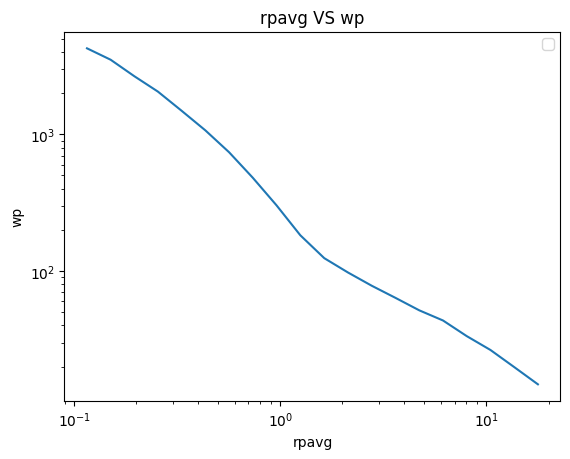

In [15]:
plot_results([rpavg_test_u], [wp_test_u])

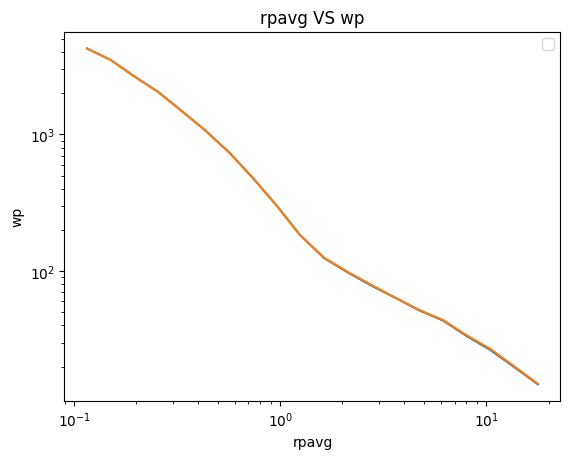

In [16]:
plot_results([rpavg_test_u, rpavg_test], [wp_test_u, wp_test])

## Scale = 60

In [21]:
norm = random.normal(size = len(gz), scale = 60)
new_gz = gz + norm
new_gz = new_gz % boxsize

In [22]:
wp_test_u, rpavg_test_u = wp_pairs_cross(hx, hy, hz, gx, gy, new_gz, pimax = 100, bins = rbins, boxsize = boxsize)
wp_test , rpavg_test = wp_pairs_cross(hx, hy, hz, gx, gy, gz, pimax = 100, bins = rbins, boxsize = boxsize)

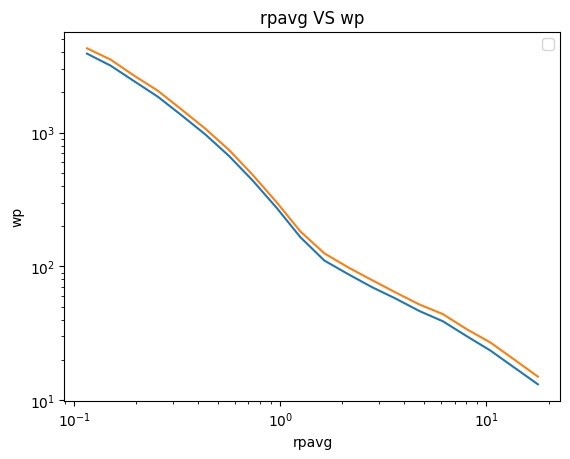

In [23]:
plot_results([rpavg_test_u, rpavg_test], [wp_test_u, wp_test])

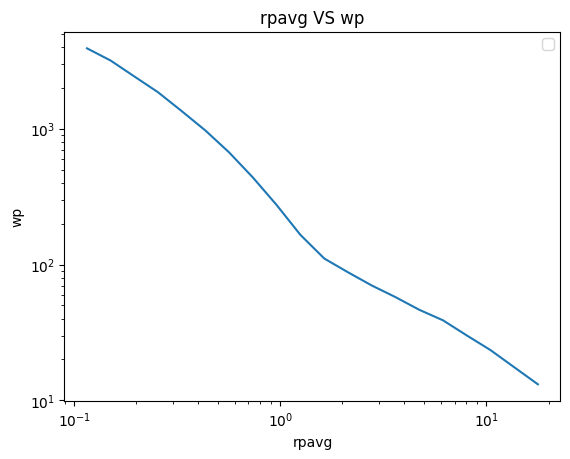

In [24]:
plot_results([rpavg_test_u], [wp_test_u])

# Mass > 10**14

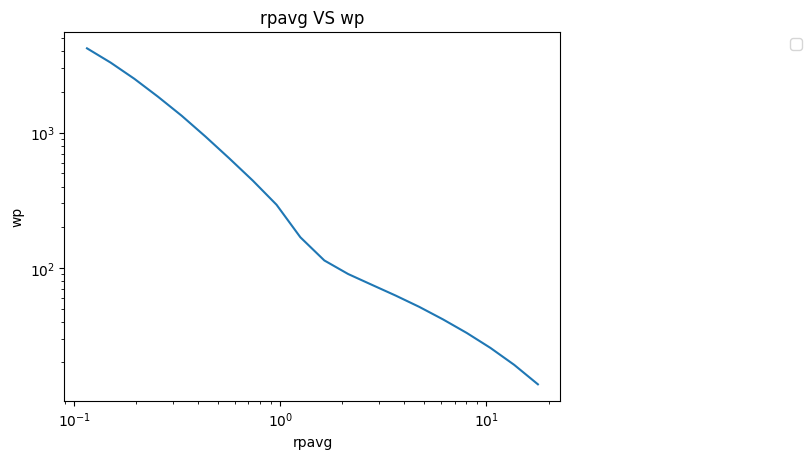

In [3]:
data14 = np.load('mass_e14.npz')
rpavg_14 = data14['array_one']
wp_14 = data14['array_two']

meanrp14, meanwp14, stdev14 = error_data(rpavg_14, wp_14)
plot_results([meanrp14], [meanwp14])

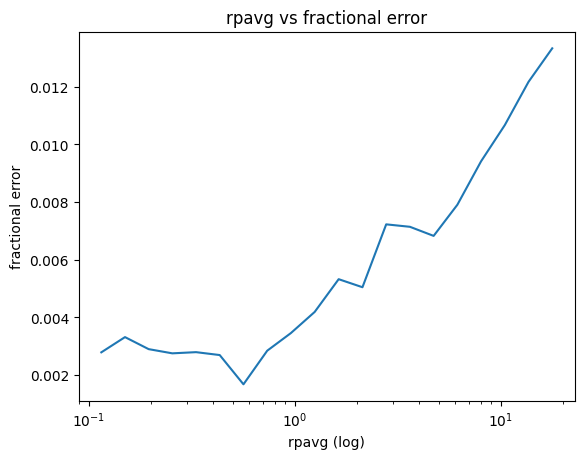

In [5]:
plot_fractional_error(stdev14, meanwp14, meanrp14)

## Scale = 30

In [4]:
all_wp14_30, all_rpavg14_30 = simulate(rbins, scale = 30, range_ = True, var = 'mass', min = 10**14)

TypeError: simulate() got an unexpected keyword argument 'scale'

In [5]:
np.savez('uncertainty_14_30.npz', array_one = all_rpavg14_30, array_two = all_wp14_30)

NameError: name 'all_rpavg14_30' is not defined

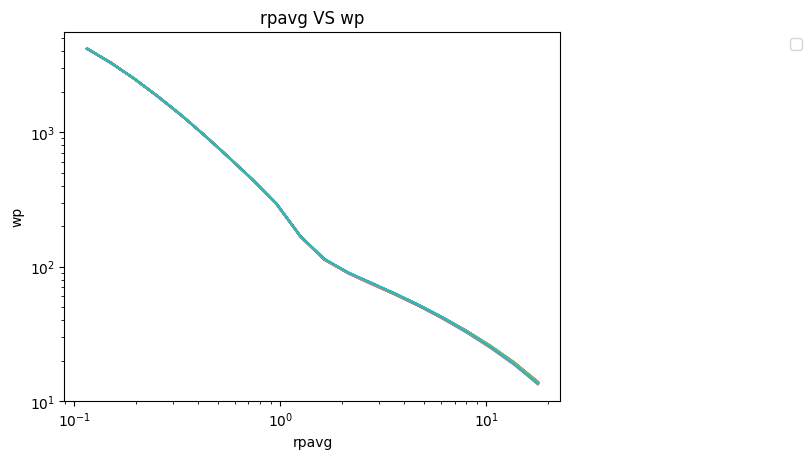

In [5]:
data_14_30 = np.load('uncertainty_14_30.npz')
rpavg_14_30 = data_14_30['array_one']
wp_14_30 = data_14_30['array_two']
plot_results(rpavg_14_30, wp_14_30)

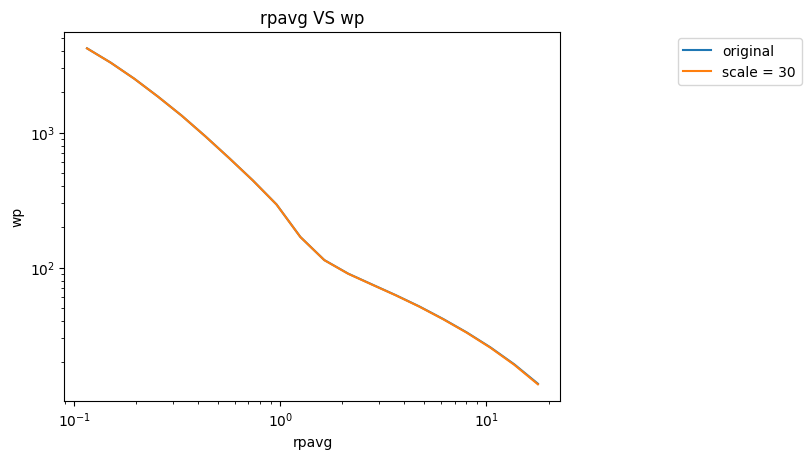

In [6]:
meanrp14_30, meanwp14_30, stdev14_30 = error_data(rpavg_14_30, wp_14_30)
plot_results([meanrp14, meanrp14_30], [meanwp14, meanwp14_30], labels = ['original', 'scale = 30'])

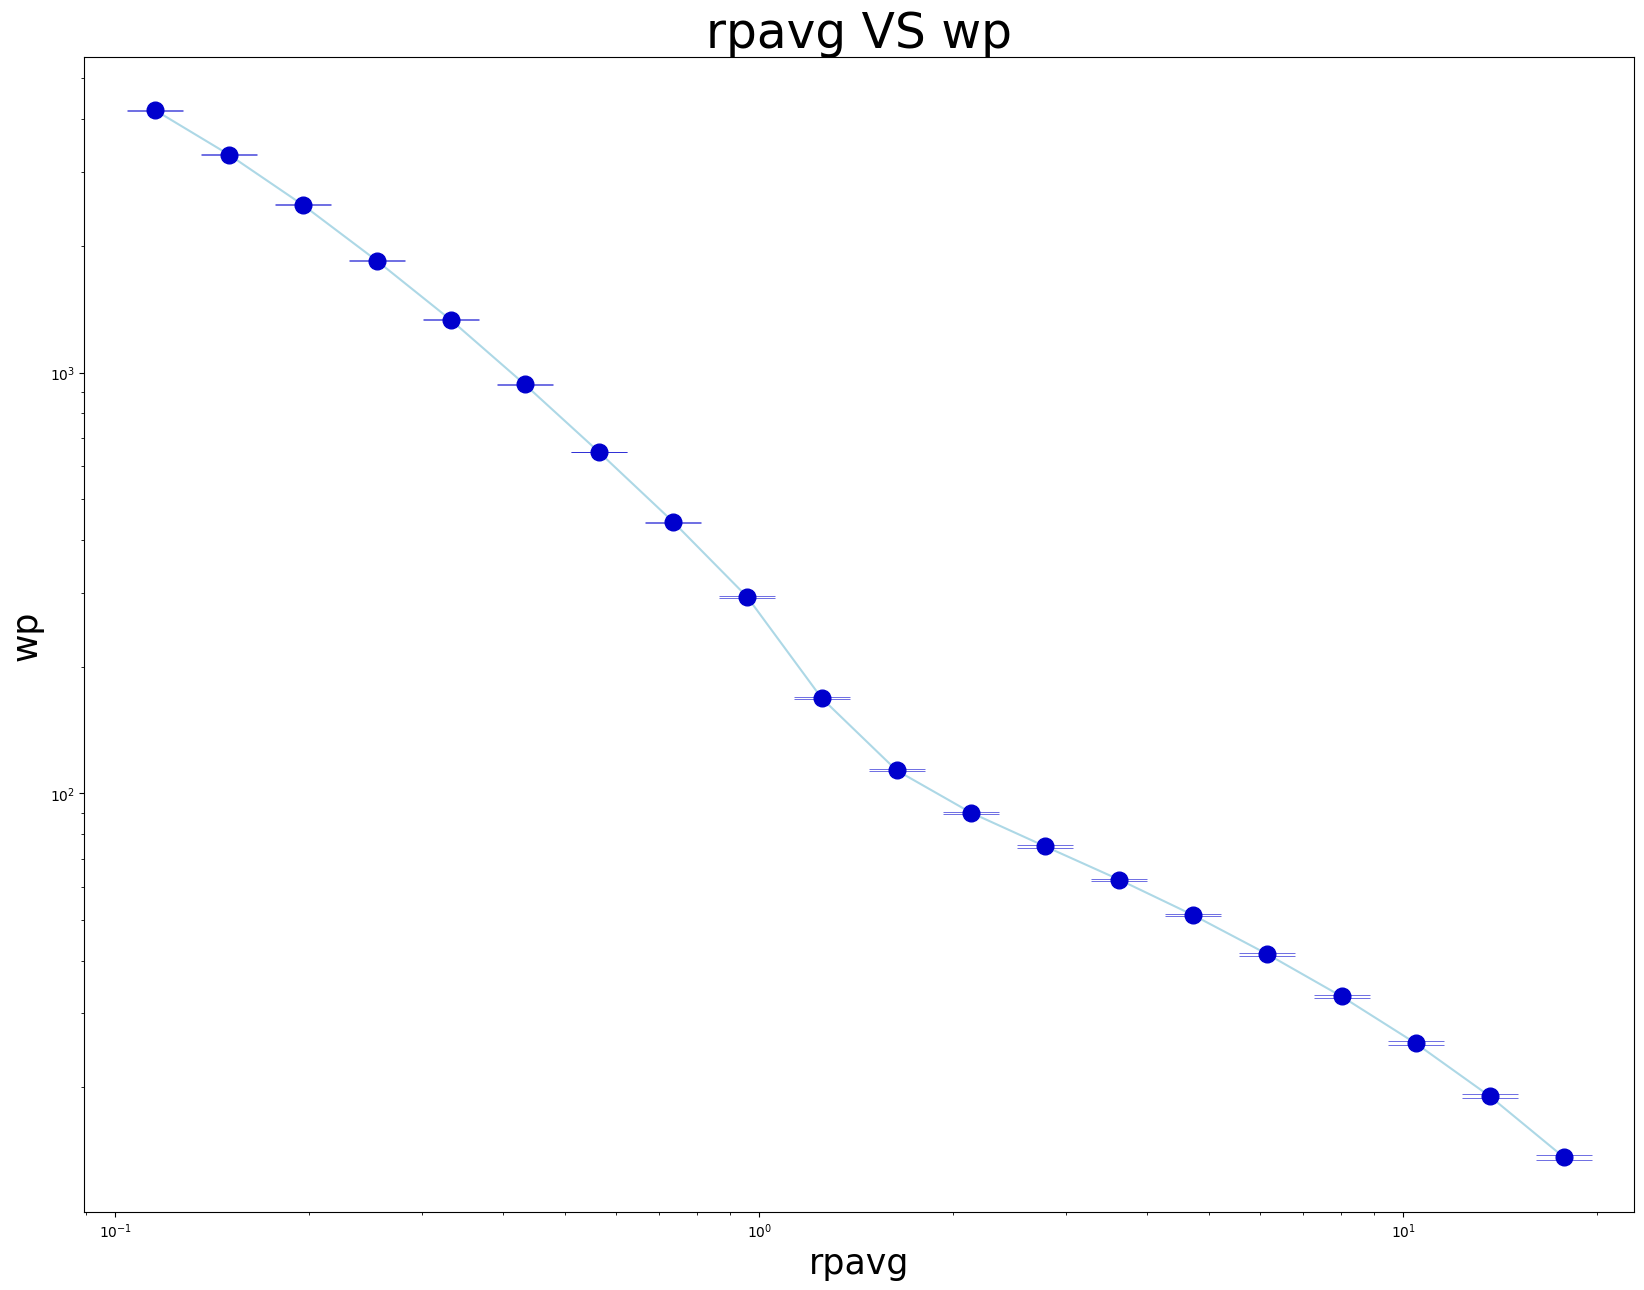

In [7]:
wp_vs_rpavg(meanrp14_30, meanwp14_30, stdev14_30)

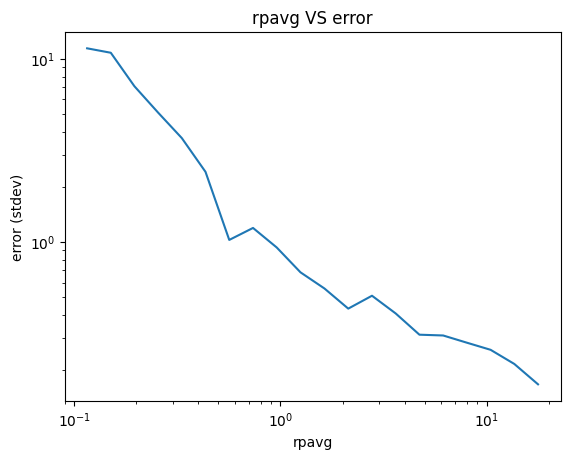

In [8]:
error_v_rp(meanrp14_30, stdev14_30)

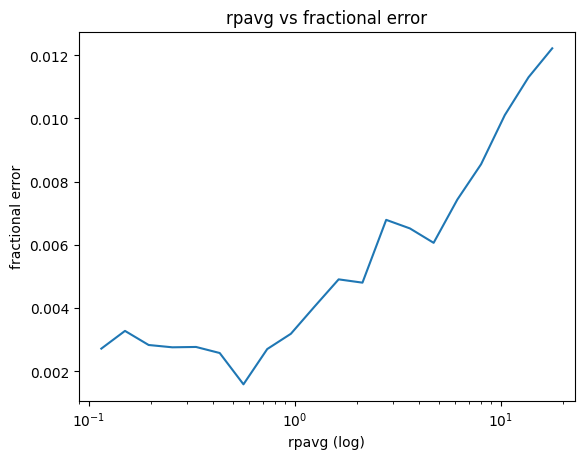

In [9]:
plot_fractional_error(stdev14_30, meanwp14_30, meanrp14_30)

## Scale = 60

In [ ]:
all_wp14_60, all_rpavg14_60 = simulate(rbins, scale_ = 60, range_ = True, var = 'mass', min = 10**14)

In [11]:
np.savez('uncertainty_14_60.npz', array_one = all_rpavg14_60, array_two = all_wp14_60)

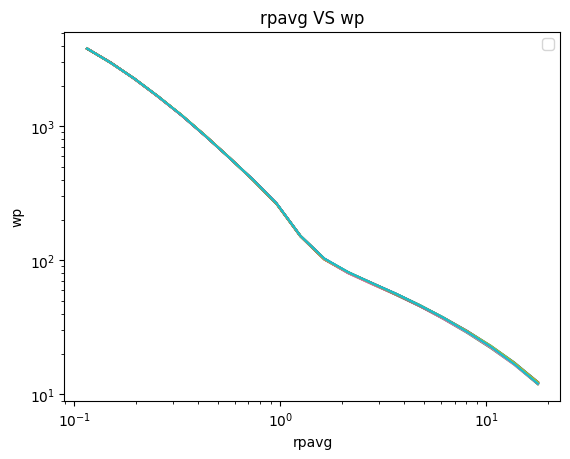

In [9]:
data = np.load('uncertainty_14_60.npz')
rpavg_14_60 = data['array_one']
wp_14_60 = data['array_two']
plot_results(rpavg_14_60, wp_14_60)

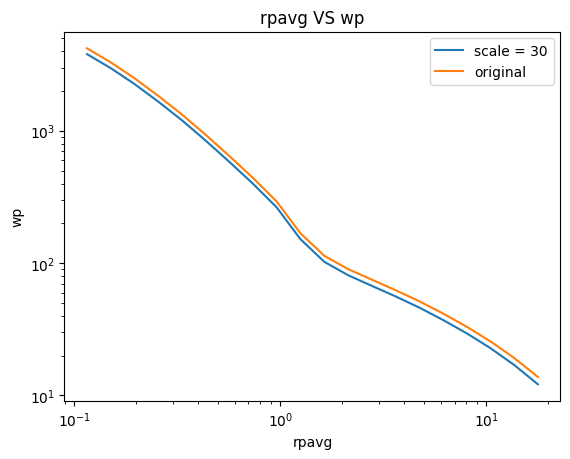

In [10]:
meanrp14_60, meanwp14_60, stdev14_60 = error_data(rpavg_14_60, wp_14_60)
plot_results([meanrp14_60, meanrp14], [meanwp14_60, meanwp14], labels = ['scale = 30', 'original'])

In [ ]:
wp_vs_rpavg(meanrp14_60, meanwp14_60, stdev14_60)

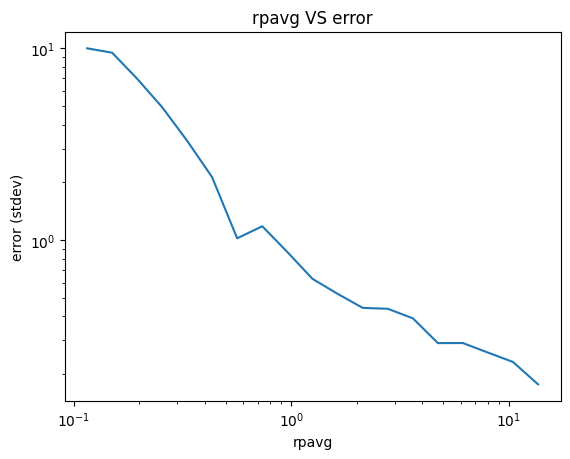

In [6]:
error_v_rp(meanrp14_60, stdev14_60)

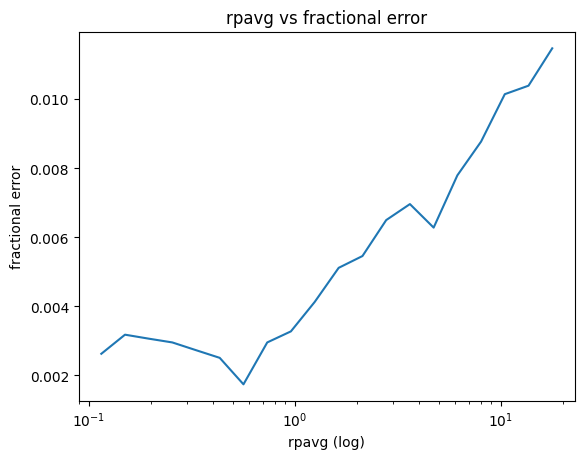

In [29]:
plot_fractional_error(stdev14_60, meanwp14_60, meanrp14_60)

## Scale = 100

In [7]:
all_wp14_100, all_rpavg14_100 = simulate(rbins, scale_ = 100, range_ = True, var = 'mass', min = 10**14)

In [8]:
np.savez('uncertainty_14_100.npz', array_one = all_rpavg14_100, array_two = all_wp14_100)

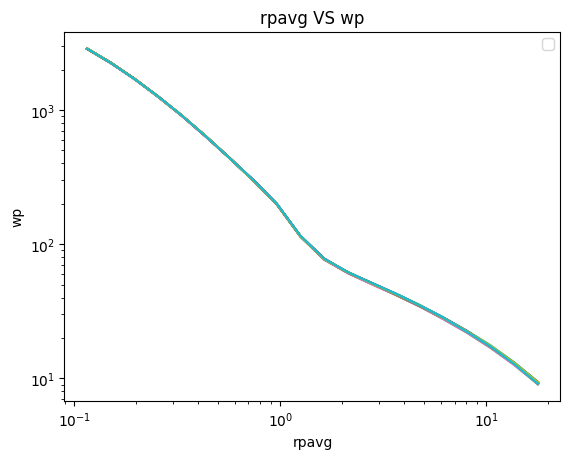

In [11]:
data14_100 = np.load('uncertainty_14_100.npz')
rpavg_14_100 = data14_100['array_one']
wp_14_100 = data14_100['array_two']
plot_results(rpavg_14_100, wp_14_100)

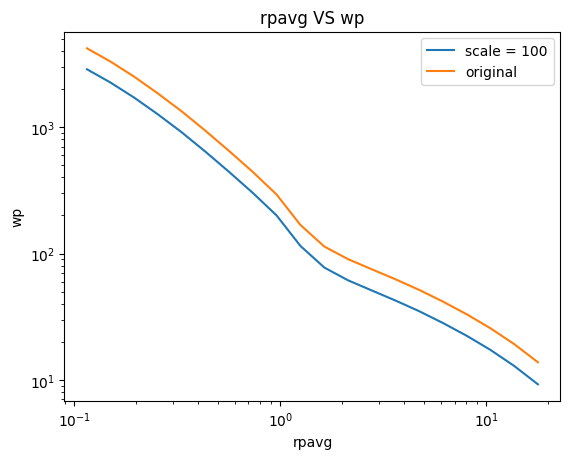

In [12]:
meanrp14_100, meanwp14_100, stdev14_100 = error_data(rpavg_14_100, wp_14_100)
plot_results([meanrp14_100, meanrp14], [meanwp14_100, meanwp14], labels = ["scale = 100", "original"])

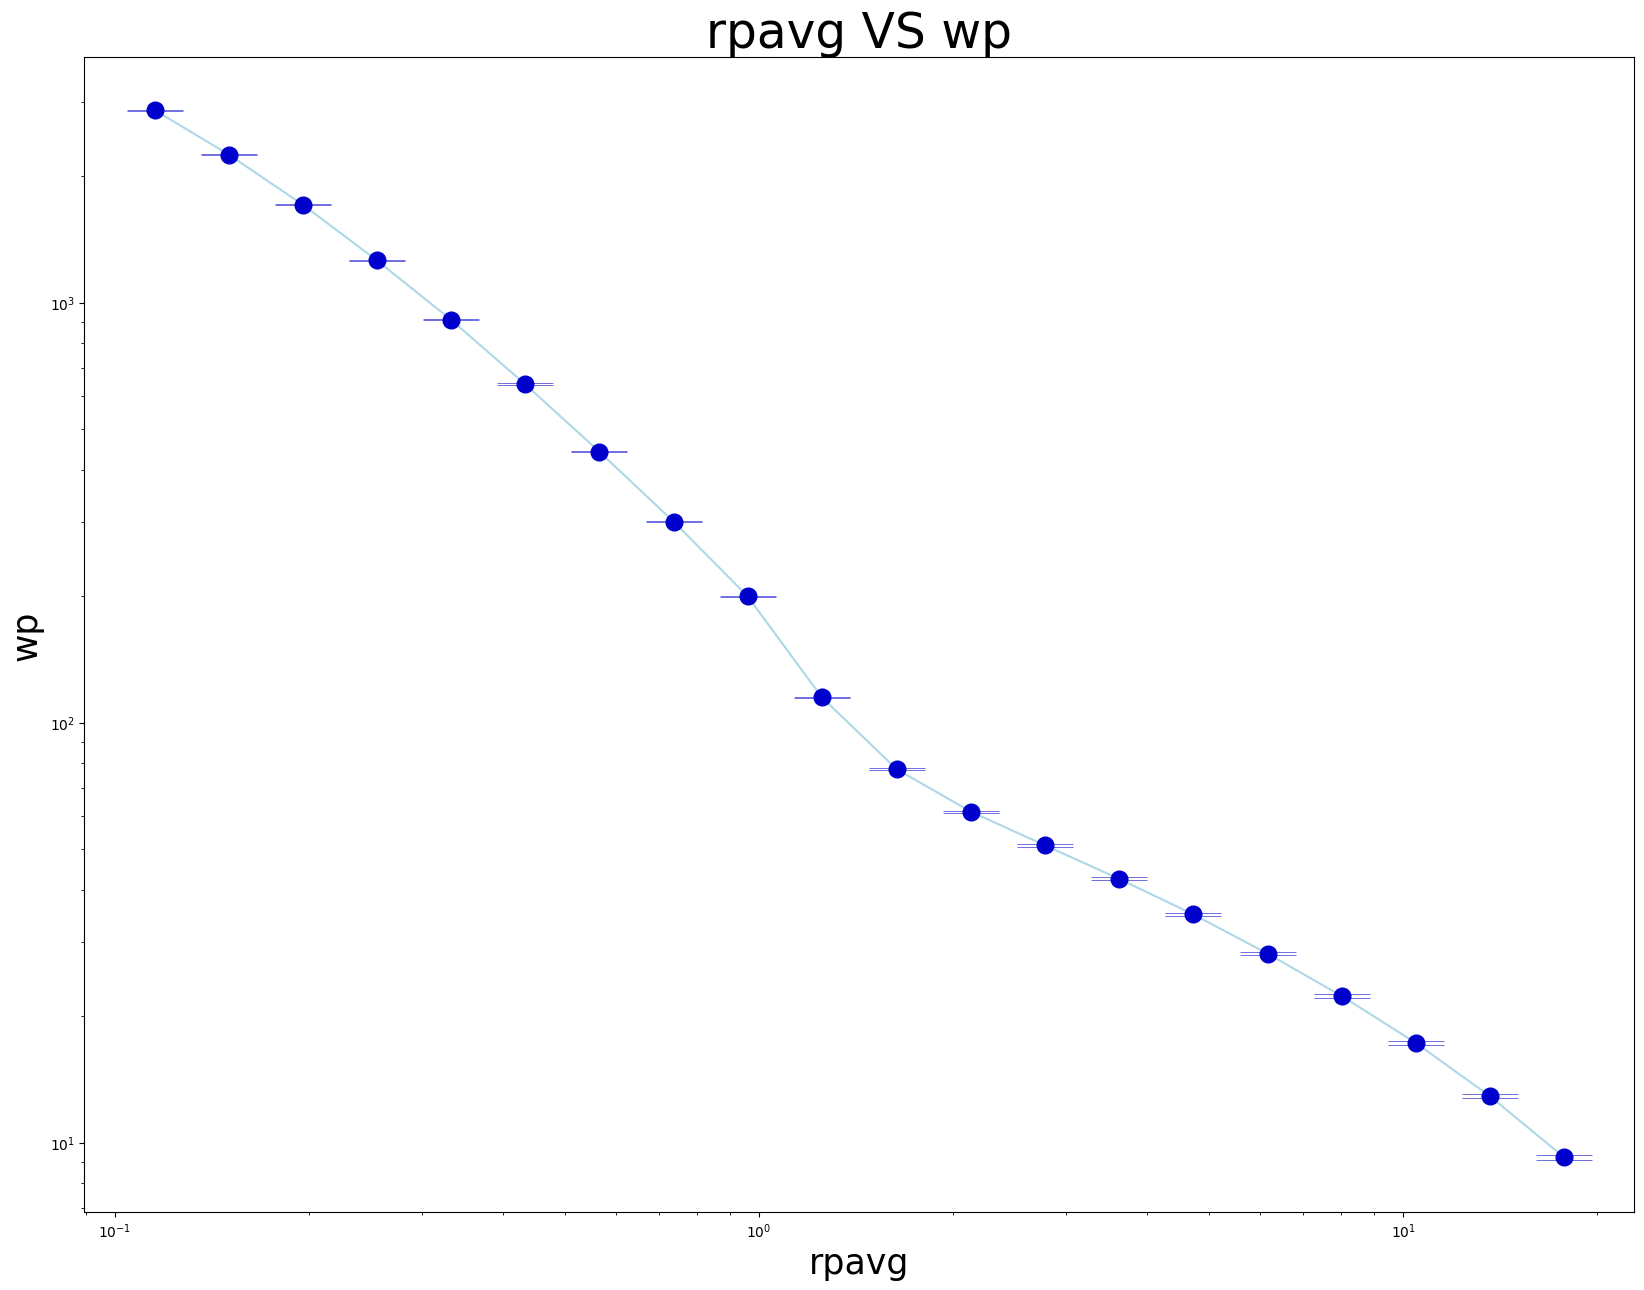

In [15]:
wp_vs_rpavg(meanrp14_100, meanwp14_100, stdev14_100)

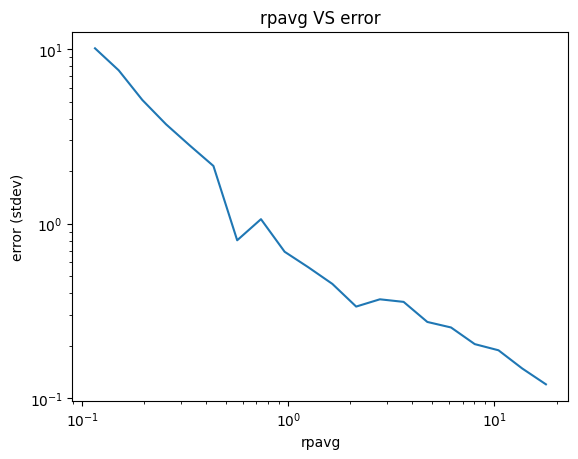

In [16]:
error_v_rp(meanrp14_100, stdev14_100)

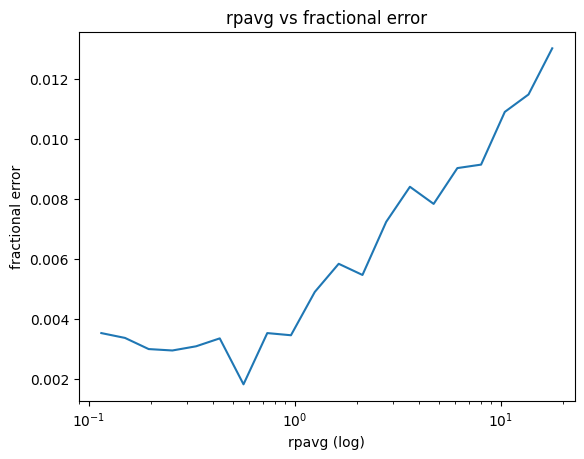

In [17]:
plot_fractional_error(stdev14_100, meanwp14_100, meanrp14_100)

## Scale-wise comparison

NameError: name 'stdev14_60' is not defined

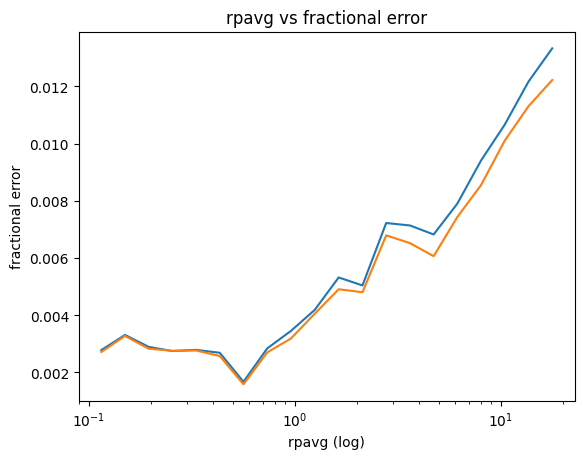

In [10]:
plot_fractional_error(stdev14, meanwp14, meanrp14)
plot_fractional_error(stdev14_30, meanwp14_30, meanrp14_30)
plot_fractional_error(stdev14_60, meanwp14_60, meanrp14_60)
plot_fractional_error(stdev14_100, meanwp14_100, meanrp14_100)
plt.legend(["scale = 0", "scale = 30", "scale = 60", "scale = 100"])
plt.show()

## Scale = 1000

In [24]:
all_wp14_1000, all_rpavg14_1000 = simulate(rbins, scale_ = 1000, range_ = True, var = 'mass', min = 10**14)

In [25]:
np.savez('uncertainty_14_1000.npz', array_one = all_rpavg14_1000, array_two = all_wp14_1000)

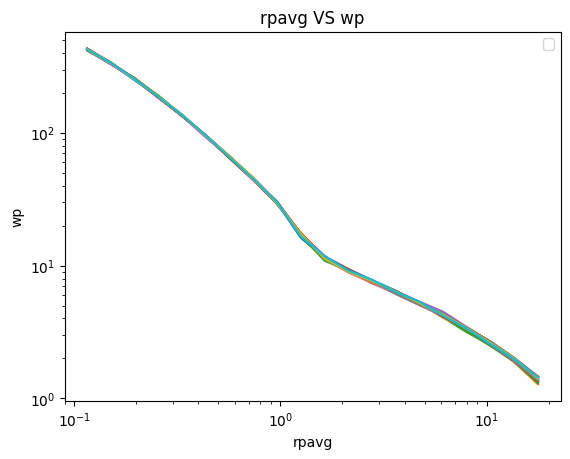

In [30]:
data14_1000 = np.load('uncertainty_14_1000.npz')
rpavg_14_1000 = data14_1000['array_one']
wp_14_1000 = data14_1000['array_two']
plot_results(rpavg_14_1000, wp_14_1000)

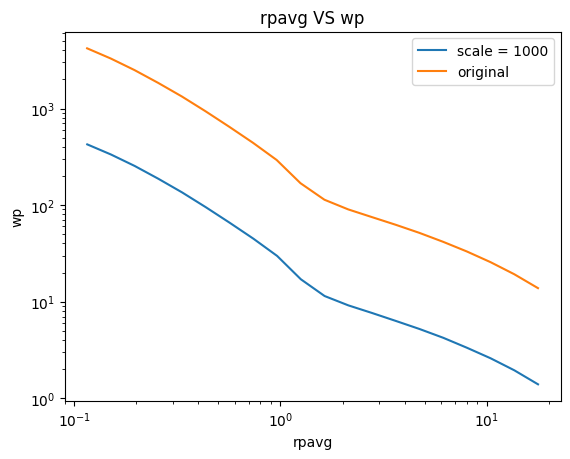

In [31]:
meanrp14_1000, meanwp14_1000, stdev14_1000 = error_data(rpavg_14_1000, wp_14_1000)
plot_results([meanrp14_1000, meanrp14], [meanwp14_1000, meanwp14], labels = ["scale = 1000", "original"])

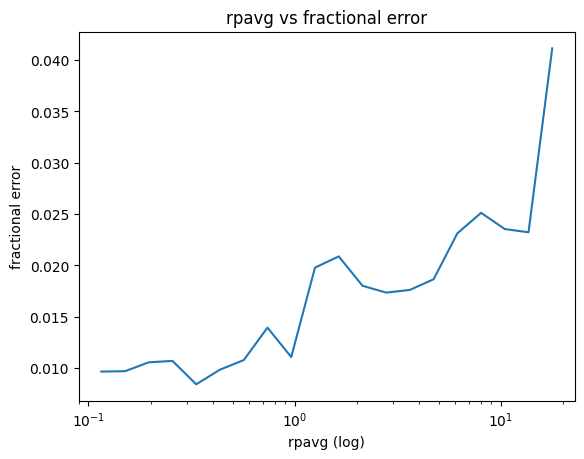

In [33]:
plot_fractional_error(stdev14_1000, meanwp14_1000, meanrp14_1000)

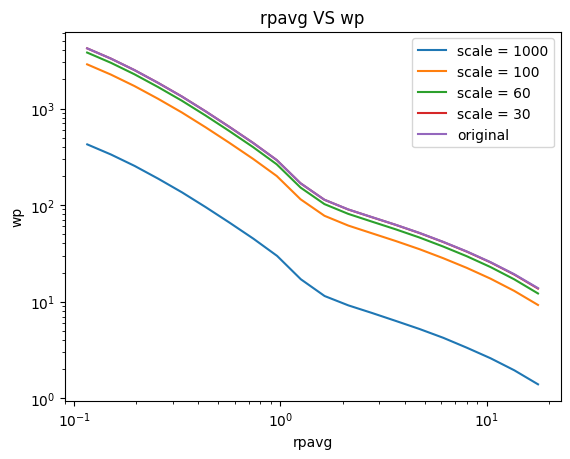

In [41]:
plot_results([meanrp14_1000, meanrp14_100, meanrp14_60, meanrp14_30, meanrp14], [meanwp14_1000, meanwp14_100, meanwp14_60, meanwp14_30, meanwp14], labels = ["scale = 1000", "scale = 100","scale = 60", "scale = 30", "original"])

# Mass > 10**13

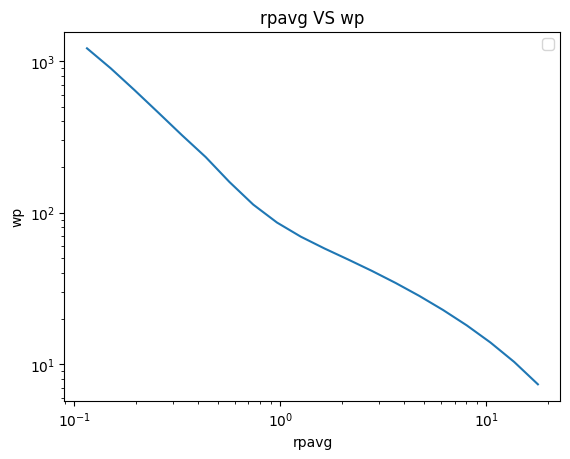

In [14]:
data13 = np.load('mass_e13.npz')
rpavg_13 = data13['array_one']
wp_13 = data13['array_two']

meanrp13, meanwp13, stdev13 = error_data(rpavg_13, wp_13)
plot_results([meanrp13], [meanwp13])

In [ ]:
plot_fractional_error()

## Scale = 30

In [ ]:
all_wp13_30, all_rpavg13_30 = simulate(rbins,scale = 30, range_ = True, var = 'mass', min = 10**13)

In [ ]:
np.savez('uncertainty_13_30.npz', array_one = all_rpavg13_30, array_two = all_wp13_30)

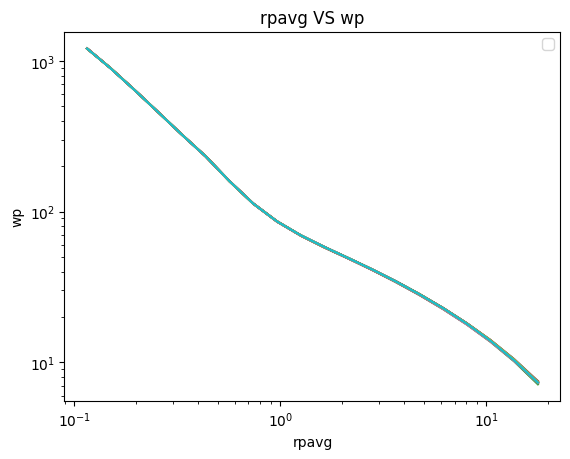

In [15]:
data13_30 = np.load('uncertainty_13_30.npz')
rpavg_13_30 = data13_30['array_one']
wp_13_30 = data13_30['array_two']
plot_results(rpavg_13_30, wp_13_30)

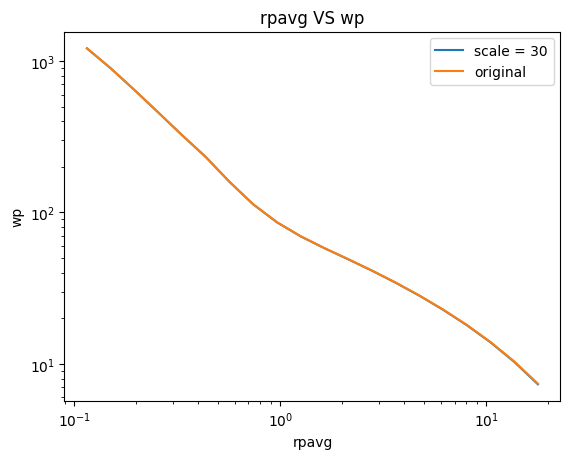

In [16]:
meanrp13_30, meanwp13_30, stdev13_30 = error_data(rpavg_13_30, wp_13_30)
plot_results([meanrp13_30, meanrp13], [meanwp13_30, meanwp13], labels = ['scale = 30', 'original'])

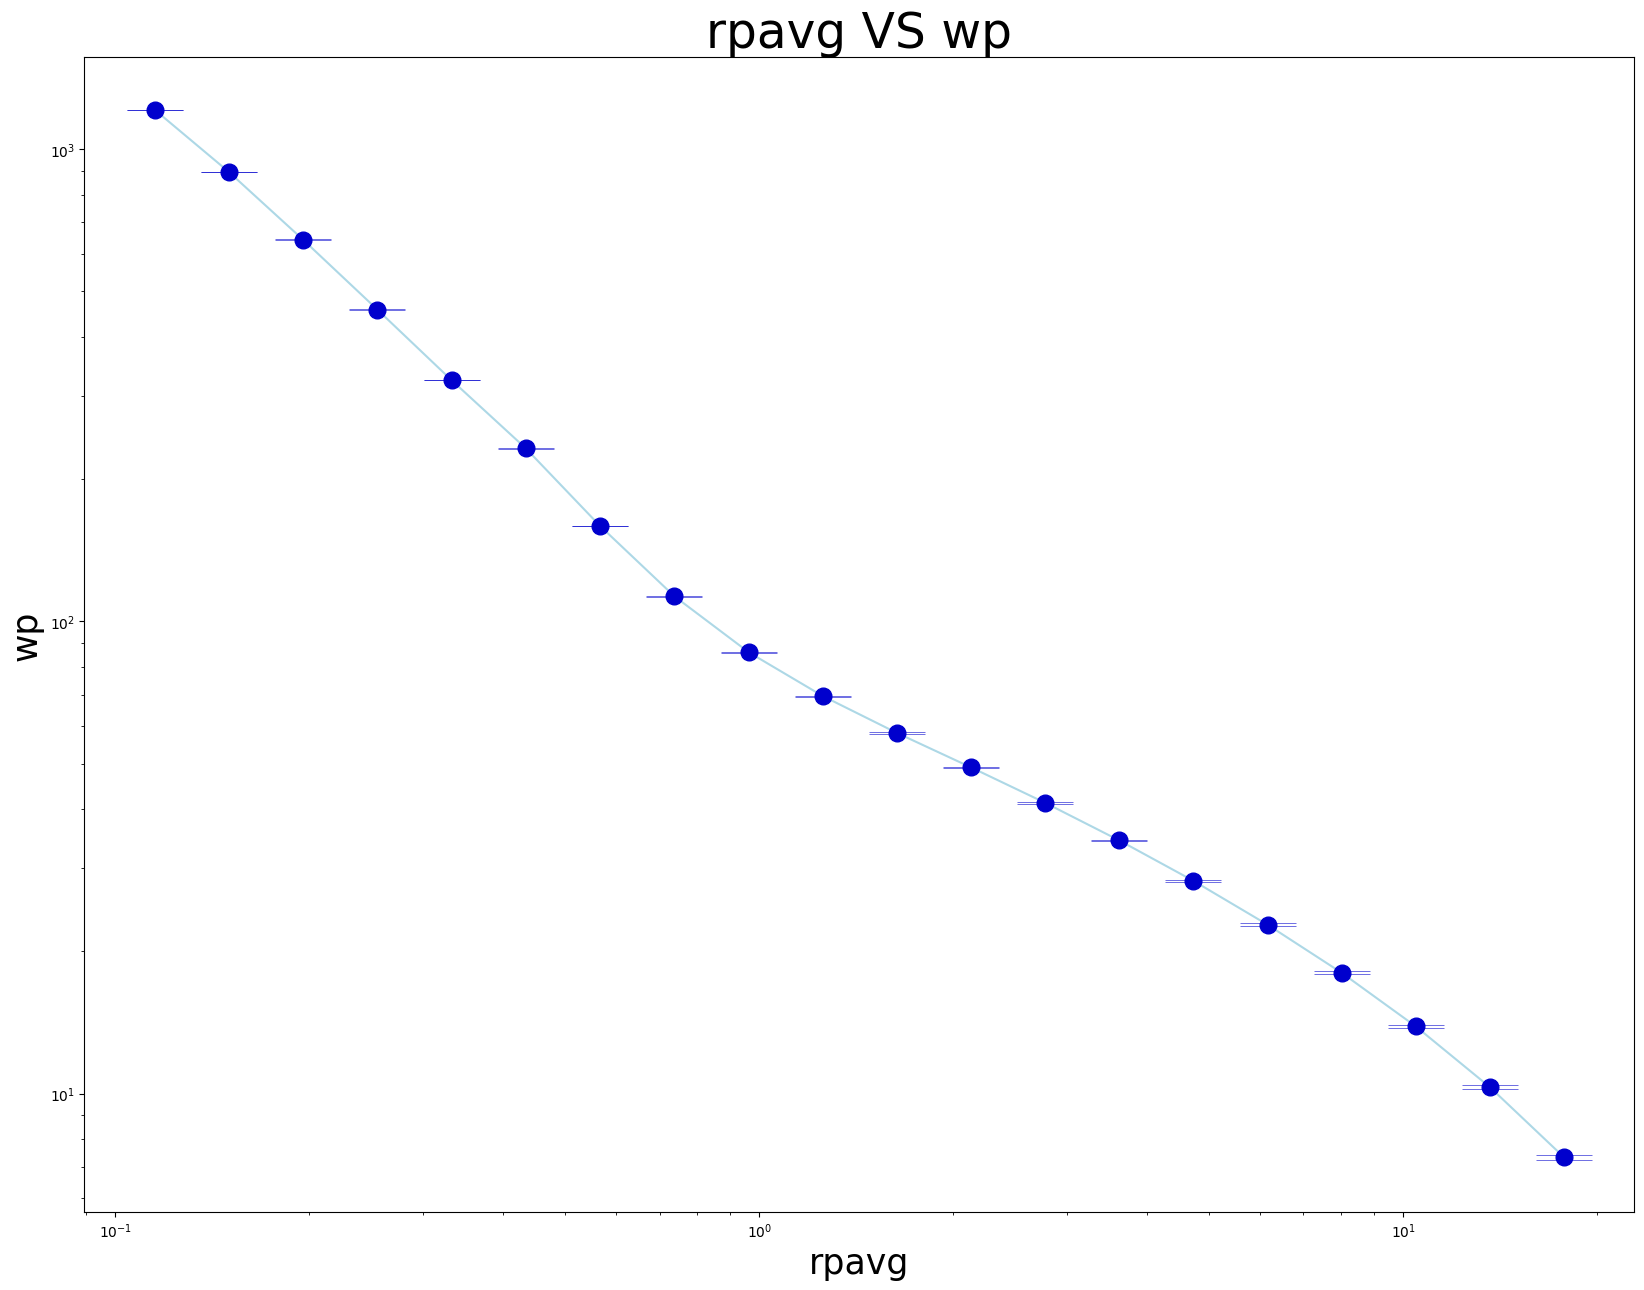

In [18]:
wp_vs_rpavg(meanrp13_30, meanwp13_30, stdev13_30)

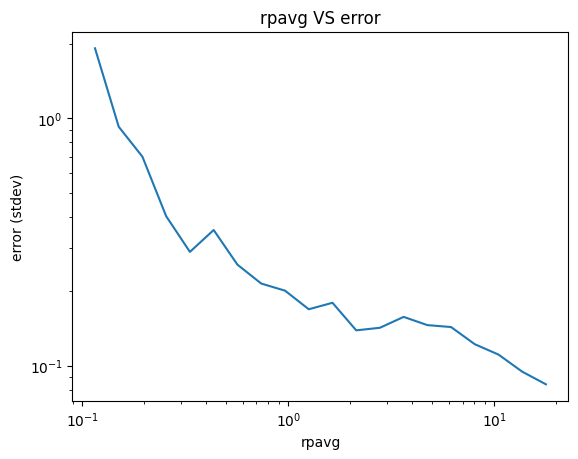

In [20]:
error_v_rp(meanrp13_30, stdev13_30)

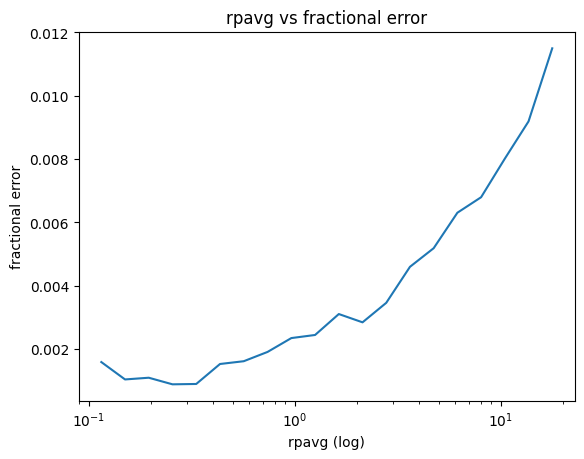

In [37]:
plot_fractional_error(stdev13_30, meanwp13_30, meanrp13_30)

## Scale = 60

In [ ]:
all_wp13_60, all_rpavg13_60 = simulate(rbins,scale_ = 60, range_ = True, var = 'mass', min = 10**13)
np.savez('uncertainty_13_60.npz', array_one = all_rpavg13_60, array_two = all_wp13_60)

NameError: name 'all_rpavg14_30' is not defined

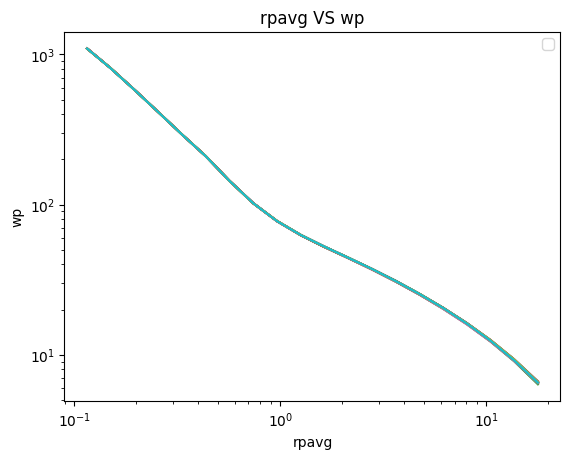

In [17]:
data13_60 = np.load('uncertainty_13_60.npz')
rpavg_13_60 = data13_60['array_one']
wp_13_60 = data13_60['array_two']
plot_results(rpavg_13_60, wp_13_60)

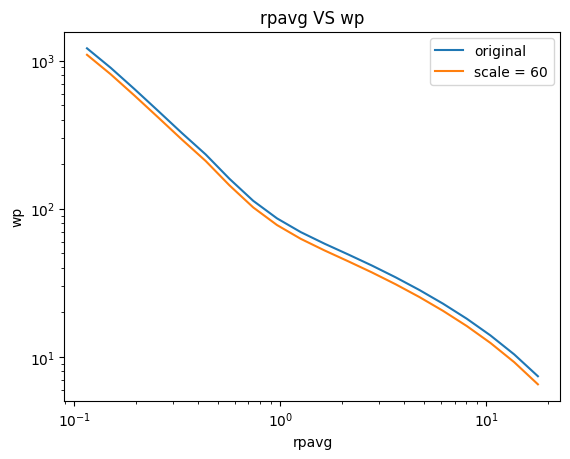

In [18]:
meanrp13_60, meanwp13_60, stdev13_60 = error_data(rpavg_13_60, wp_13_60)
plot_results([meanrp13, meanrp13_60], [meanwp13, meanwp13_60], labels=["original", "scale = 60"])

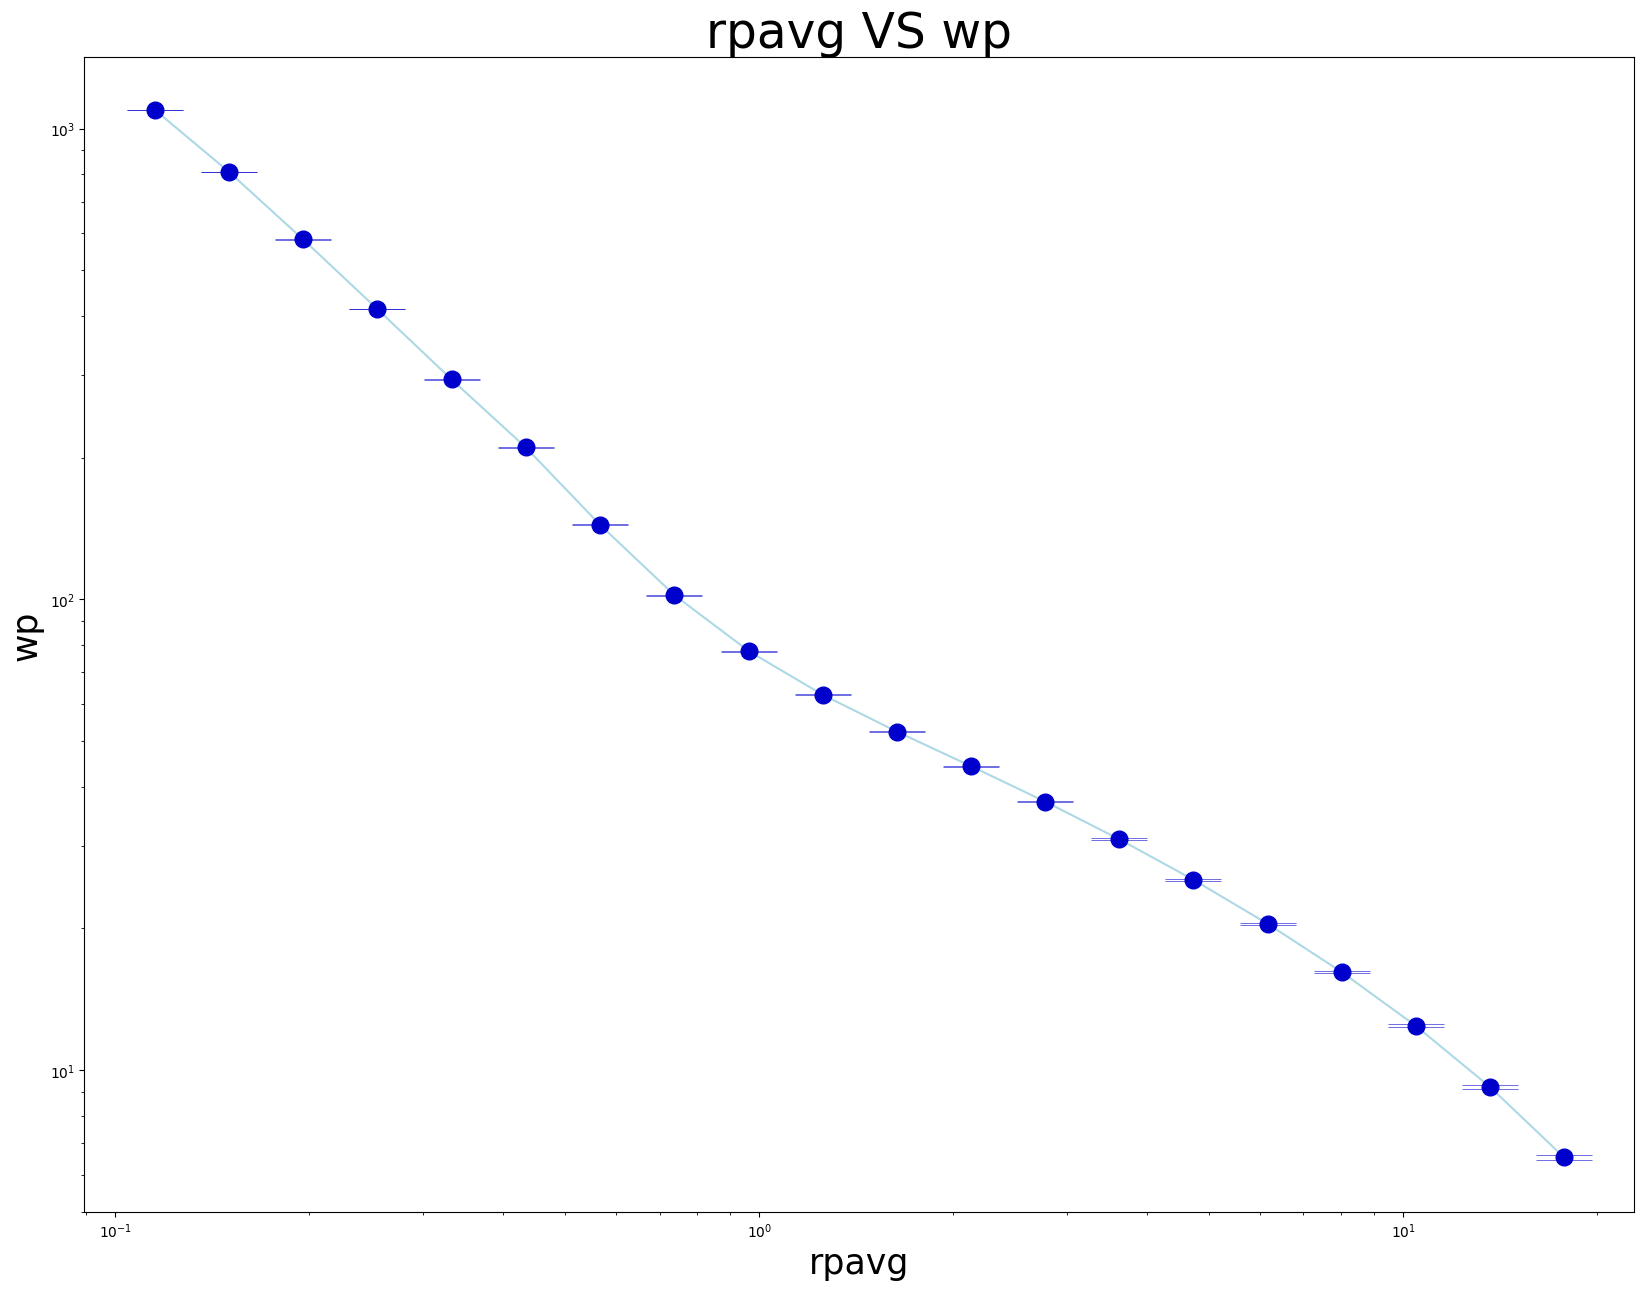

In [21]:
wp_vs_rpavg(meanrp13_60, meanwp13_60, stdev13_60)

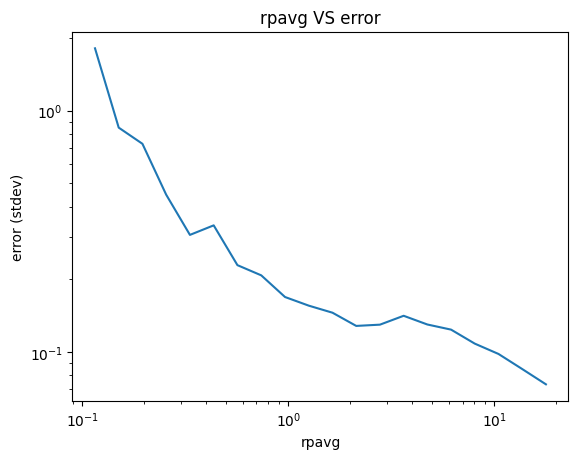

In [22]:
error_v_rp(meanrp13_60, stdev13_60)

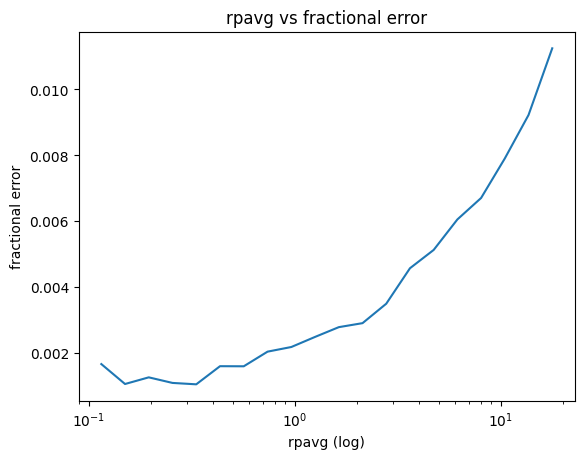

In [23]:
plot_fractional_error(stdev13_60, meanwp13_60, meanrp13_60)

## Scale = 100

In [8]:
all_wp13_100, all_rpavg13_100 = simulate(rbins,scale_ = 100, range_ = True, var = 'mass', min = 10**13)
np.savez('uncertainty_13_100.npz', array_one = all_rpavg13_100, array_two = all_wp13_100)

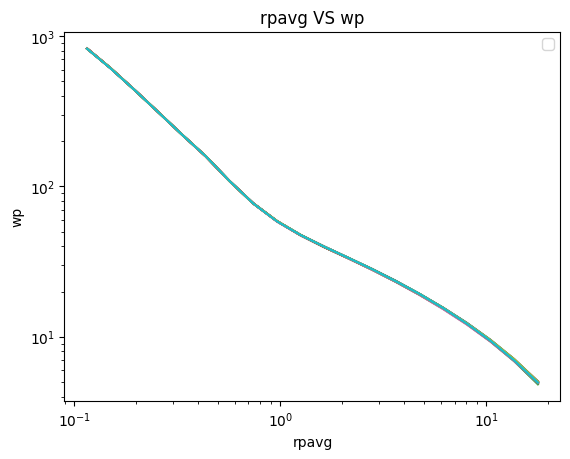

In [19]:
data13_100 = np.load('uncertainty_13_100.npz')
rpavg_13_100 = data13_100['array_one']
wp_13_100 = data13_100['array_two']
plot_results(rpavg_13_100, wp_13_100)

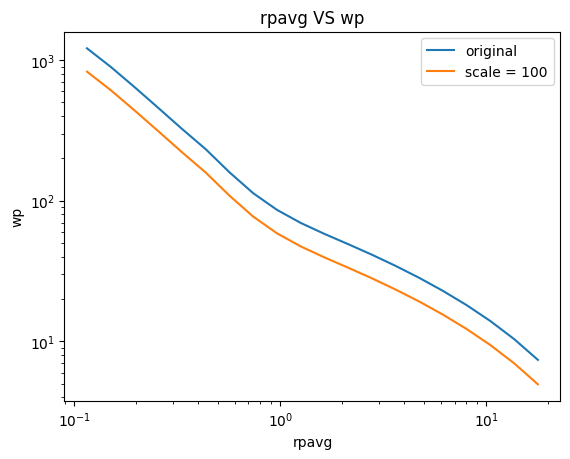

In [20]:
meanrp13_100, meanwp13_100, stdev13_100 = error_data(rpavg_13_100, wp_13_100)
plot_results([meanrp13, meanrp13_100], [meanwp13, meanwp13_100], labels=["original", "scale = 100"])

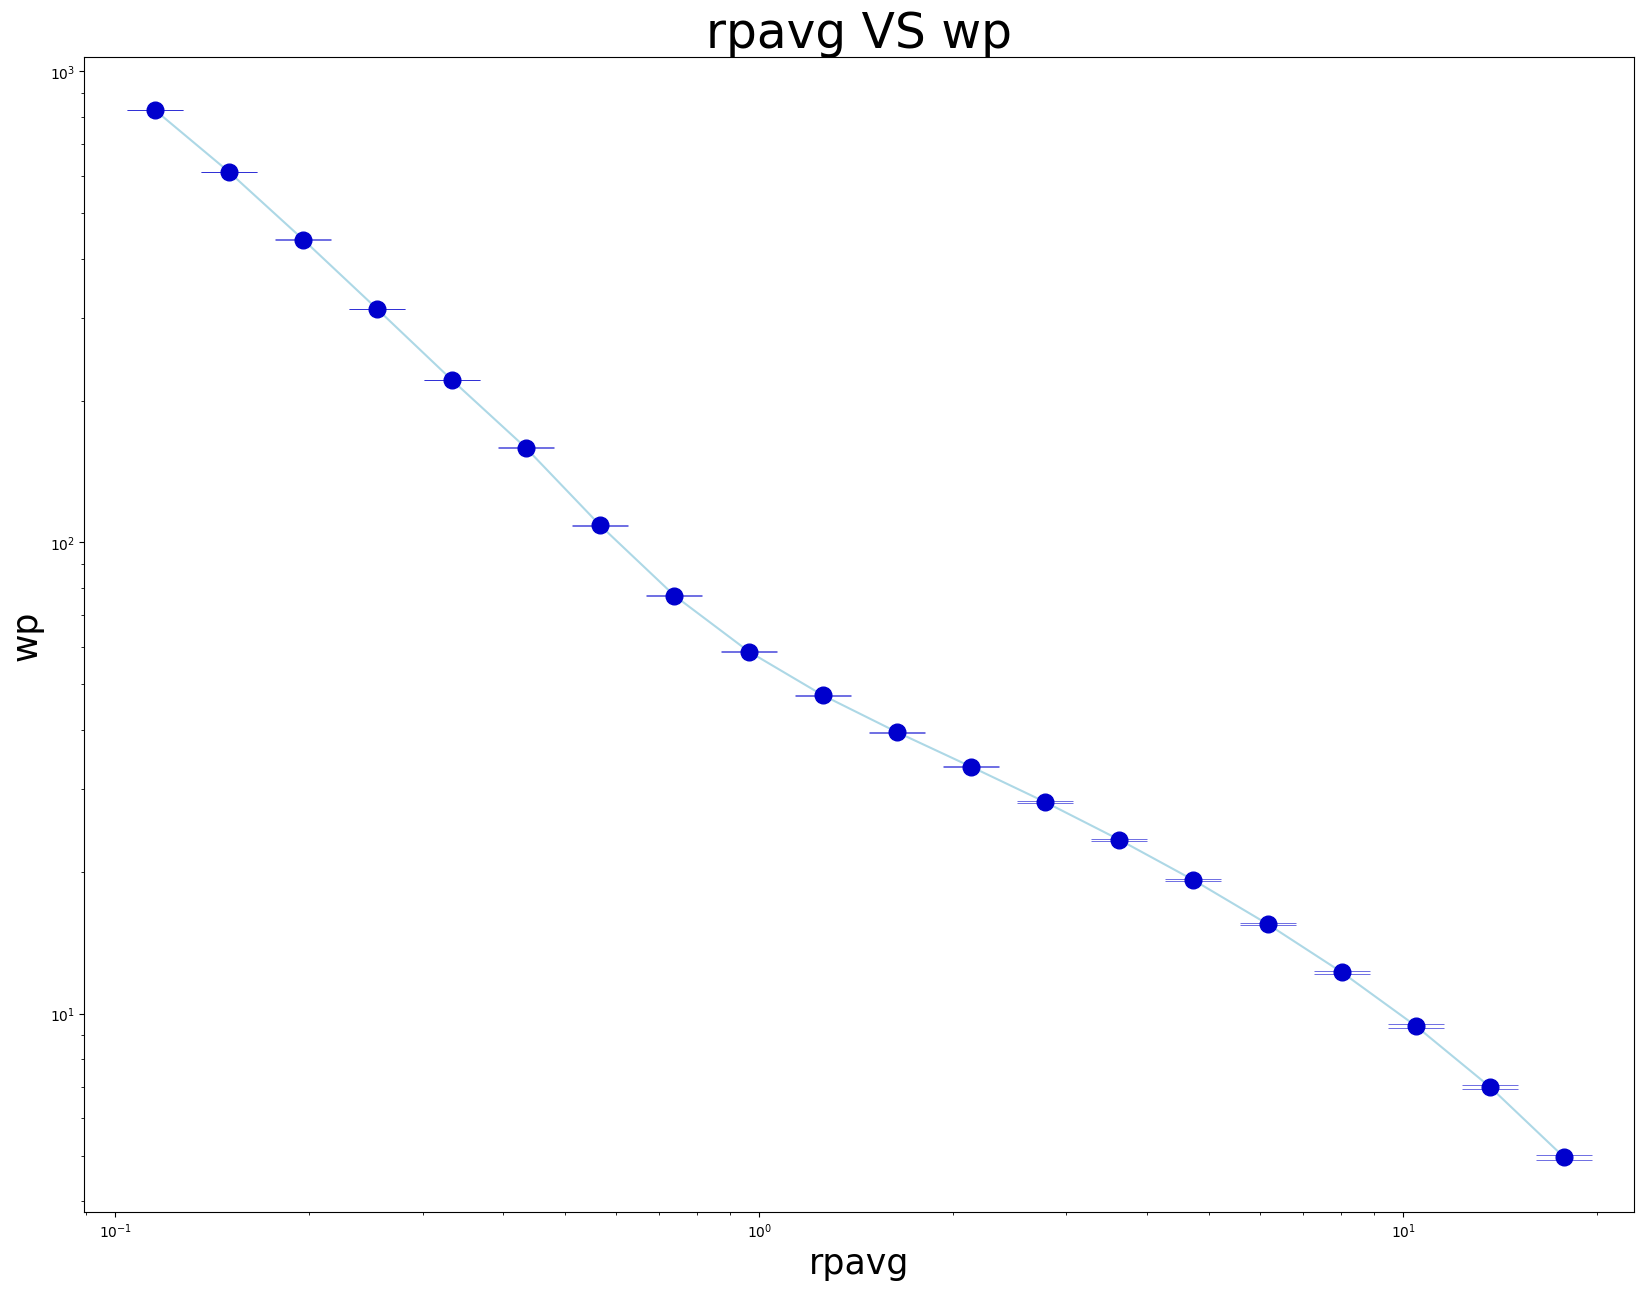

In [24]:
wp_vs_rpavg(meanrp13_100, meanwp13_100, stdev13_100)

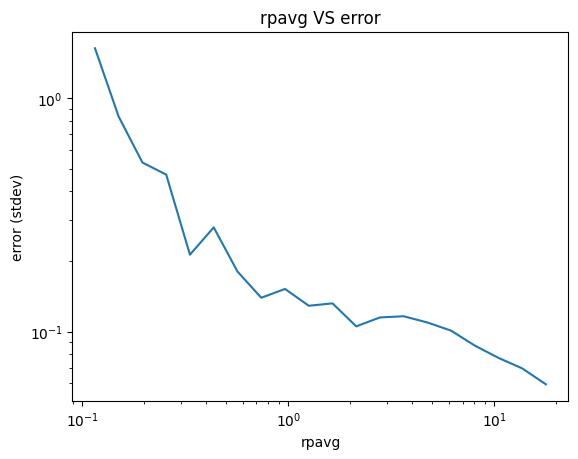

In [25]:
error_v_rp(meanrp13_100, stdev13_100)

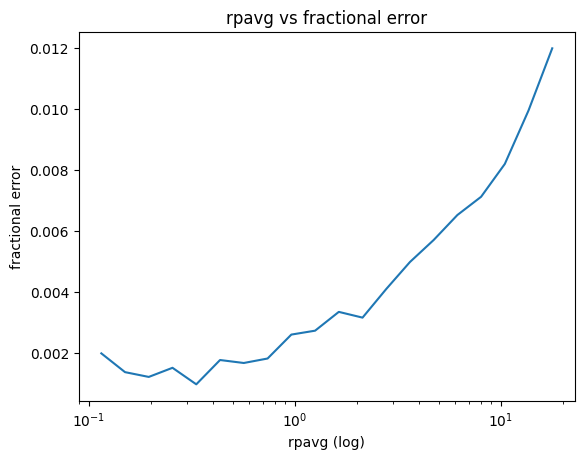

In [26]:
plot_fractional_error(stdev13_100, meanwp13_100, meanrp13_100)

## Scale-wise comparison

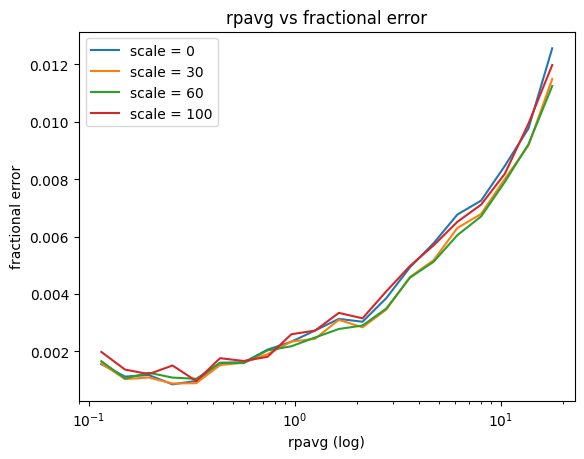

In [24]:
plot_fractional_error(stdev13, meanwp13, meanrp13)
plot_fractional_error(stdev13_30, meanwp13_30, meanrp13_30)
plot_fractional_error(stdev13_60, meanwp13_60, meanrp13_60)
plot_fractional_error(stdev13_100, meanwp13_100, meanrp13_100)
plt.legend(["scale = 0", "scale = 30", "scale = 60", "scale = 100"])
plt.show()


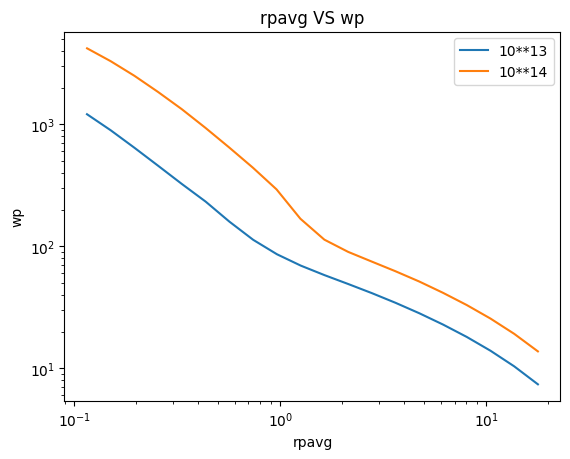

In [25]:
plot_results([meanrp13,meanrp14], [meanwp13, meanwp14], labels = ['10**13', '10**14'])
plt.show()

## Scale = 1000

In [ ]:
all_wp13_1000, all_rpavg13_1000 = simulate(rbins,scale_ = 1000, range_ = True, var = 'mass', min = 10**13)

NameError: name 'all_wp13_100' is not defined

In [7]:
np.savez('uncertainty_13_1000.npz', array_one = all_rpavg13_1000, array_two = all_wp13_1000)

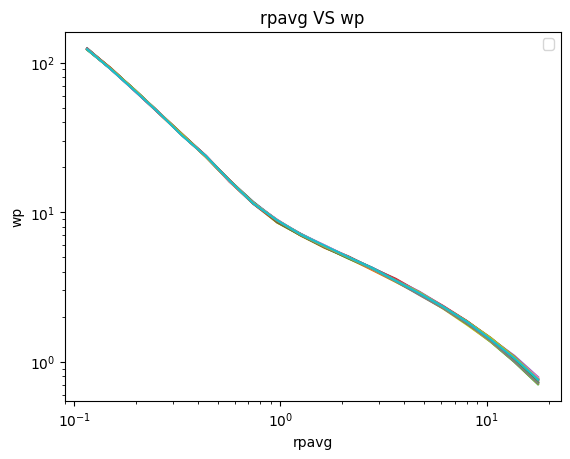

In [14]:
data13_1000 = np.load('uncertainty_13_1000.npz')
rpavg_13_1000 = data13_1000['array_one']
wp_13_1000 = data13_1000['array_two']
plot_results(rpavg_13_1000, wp_13_1000)

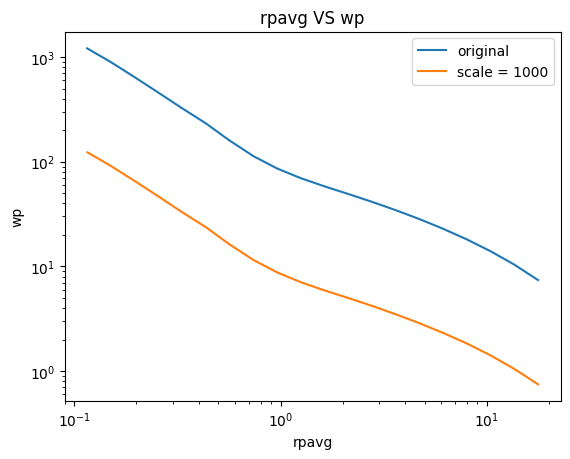

In [15]:
meanrp13_1000, meanwp13_1000, stdev13_1000 = error_data(rpavg_13_1000, wp_13_1000)
plot_results([meanrp13, meanrp13_1000], [meanwp13, meanwp13_1000], labels=["original", "scale = 1000"])

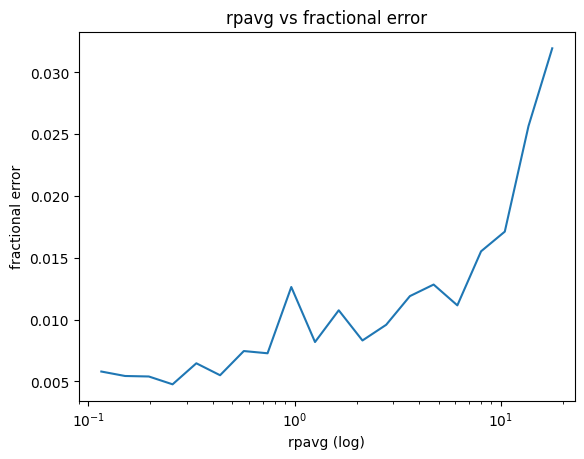

In [8]:
plot_fractional_error(stdev13_1000, meanwp13_1000, meanrp13_1000)

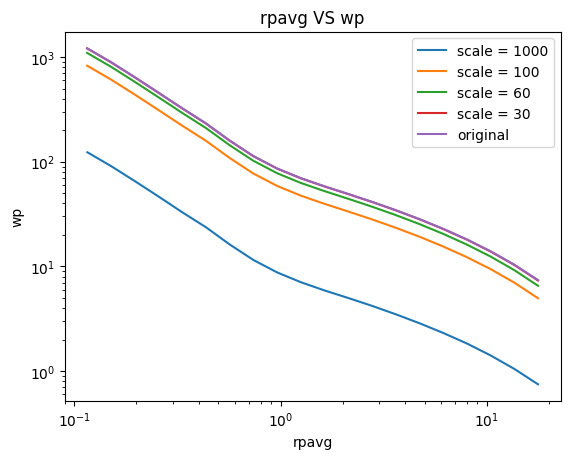

In [16]:
plot_results([meanrp13_1000, meanrp13_100, meanrp13_60, meanrp13_30, meanrp13], [meanwp13_1000, meanwp13_100, meanwp13_60, meanwp13_30, meanwp13], labels = [ "scale = 1000", "scale = 100","scale = 60", "scale = 30", "original"])

# Mass > 0

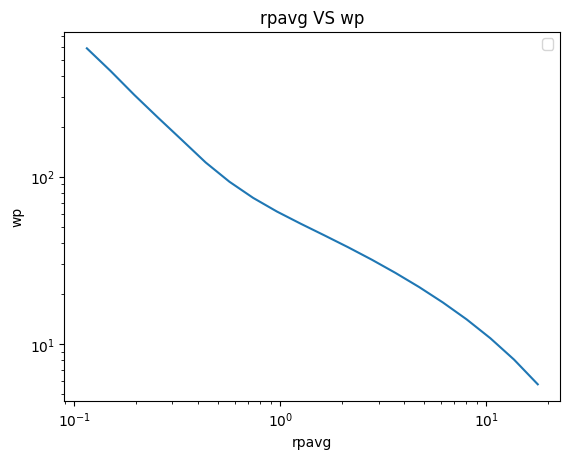

In [8]:
data0 = np.load('mass_0.npz')
rpavg_0 = data0['array_one']
wp_0 = data0['array_two']

meanrp0, meanwp0, stdev0 = error_data(rpavg_0, wp_0)
plot_results([meanrp0], [meanwp0])

## Scale = 30

In [ ]:
all_wp0_30, all_rpavg0_30 = simulate(rbins, scale_ = 30)

In [ ]:
np.savez('uncertainty_0_30.npz', array_one = all_rpavg0_30, array_two = all_wp0_30)

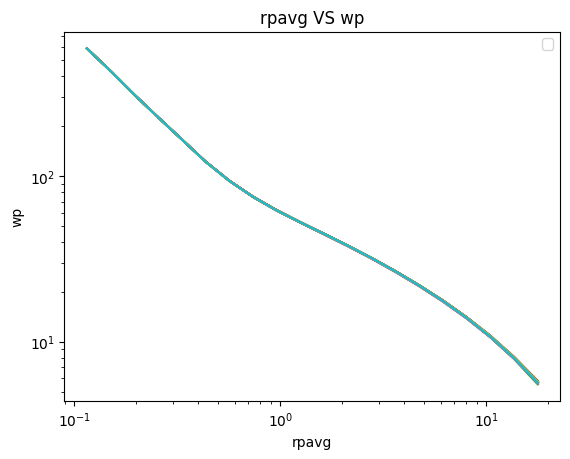

In [17]:
data0_30 = np.load('uncertainty_0_30.npz')
rpavg_0_30 = data0_30['array_one']
wp_0_30= data0_30['array_two']
plot_results(rpavg_0_30, wp_0_30)

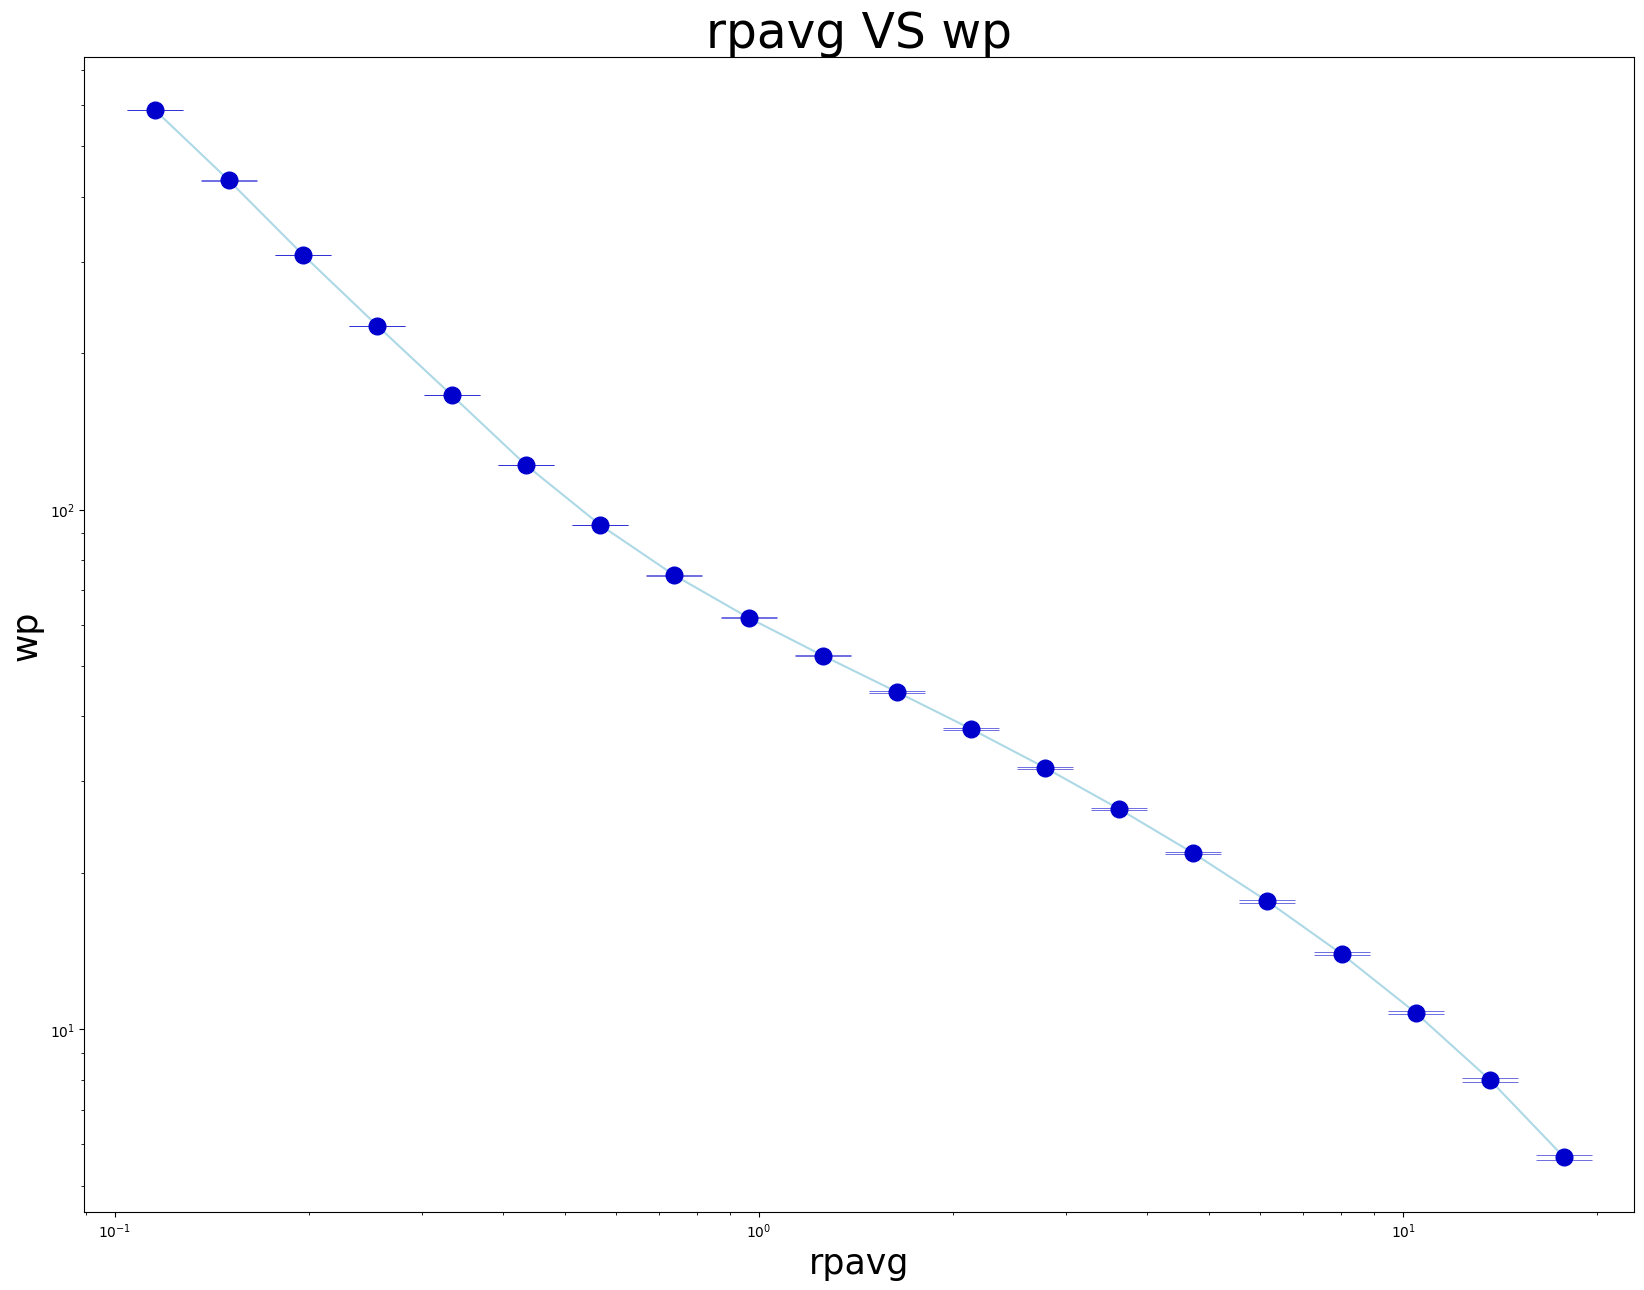

In [18]:
meanrp0_30, meanwp0_30, stdev0_30 = error_data(rpavg_0_30, wp_0_30)
wp_vs_rpavg(meanrp0_30, meanwp0_30, stdev0_30)

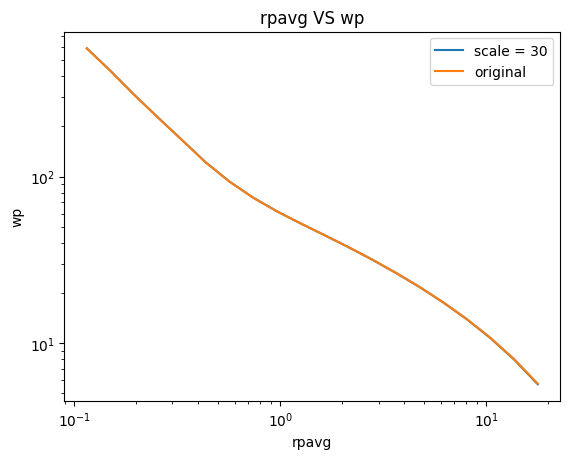

In [21]:
plot_results([meanrp0_30, meanrp0], [meanwp0_30, meanwp0], labels = ["scale = 30", "original"])

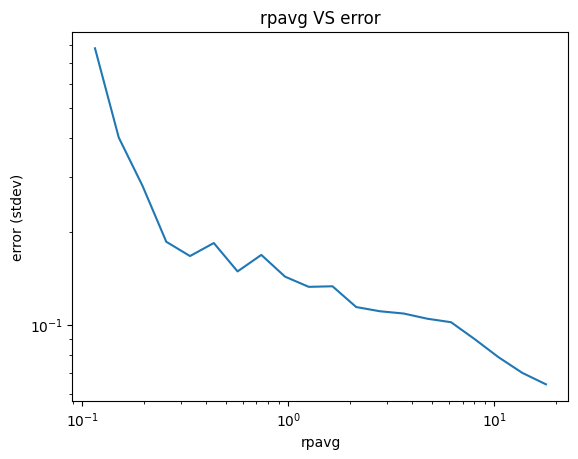

In [11]:
error_v_rp(meanrp0_30, stdev0_30)

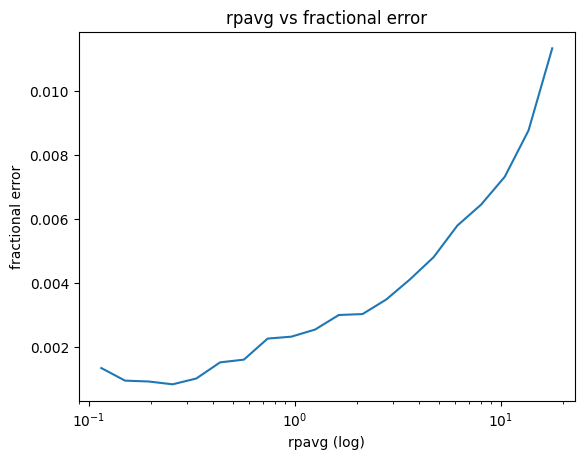

In [13]:
plot_fractional_error(stdev0_30, meanwp0_30, meanrp0_30)

## Scale = 60

In [6]:
all_wp0_60, all_rpavg0_60 = simulate(rbins, scale_ = 60)
np.savez('uncertainty_0_60.npz', array_one = all_rpavg0_60, array_two = all_wp0_60)

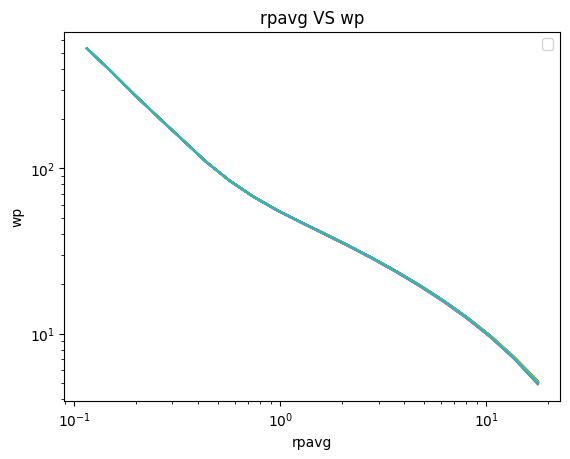

In [19]:
data0_60 = np.load('uncertainty_0_60.npz')
rpavg_0_60 = data0_60['array_one']
wp_0_60= data0_60['array_two']
plot_results(rpavg_0_60, wp_0_60)

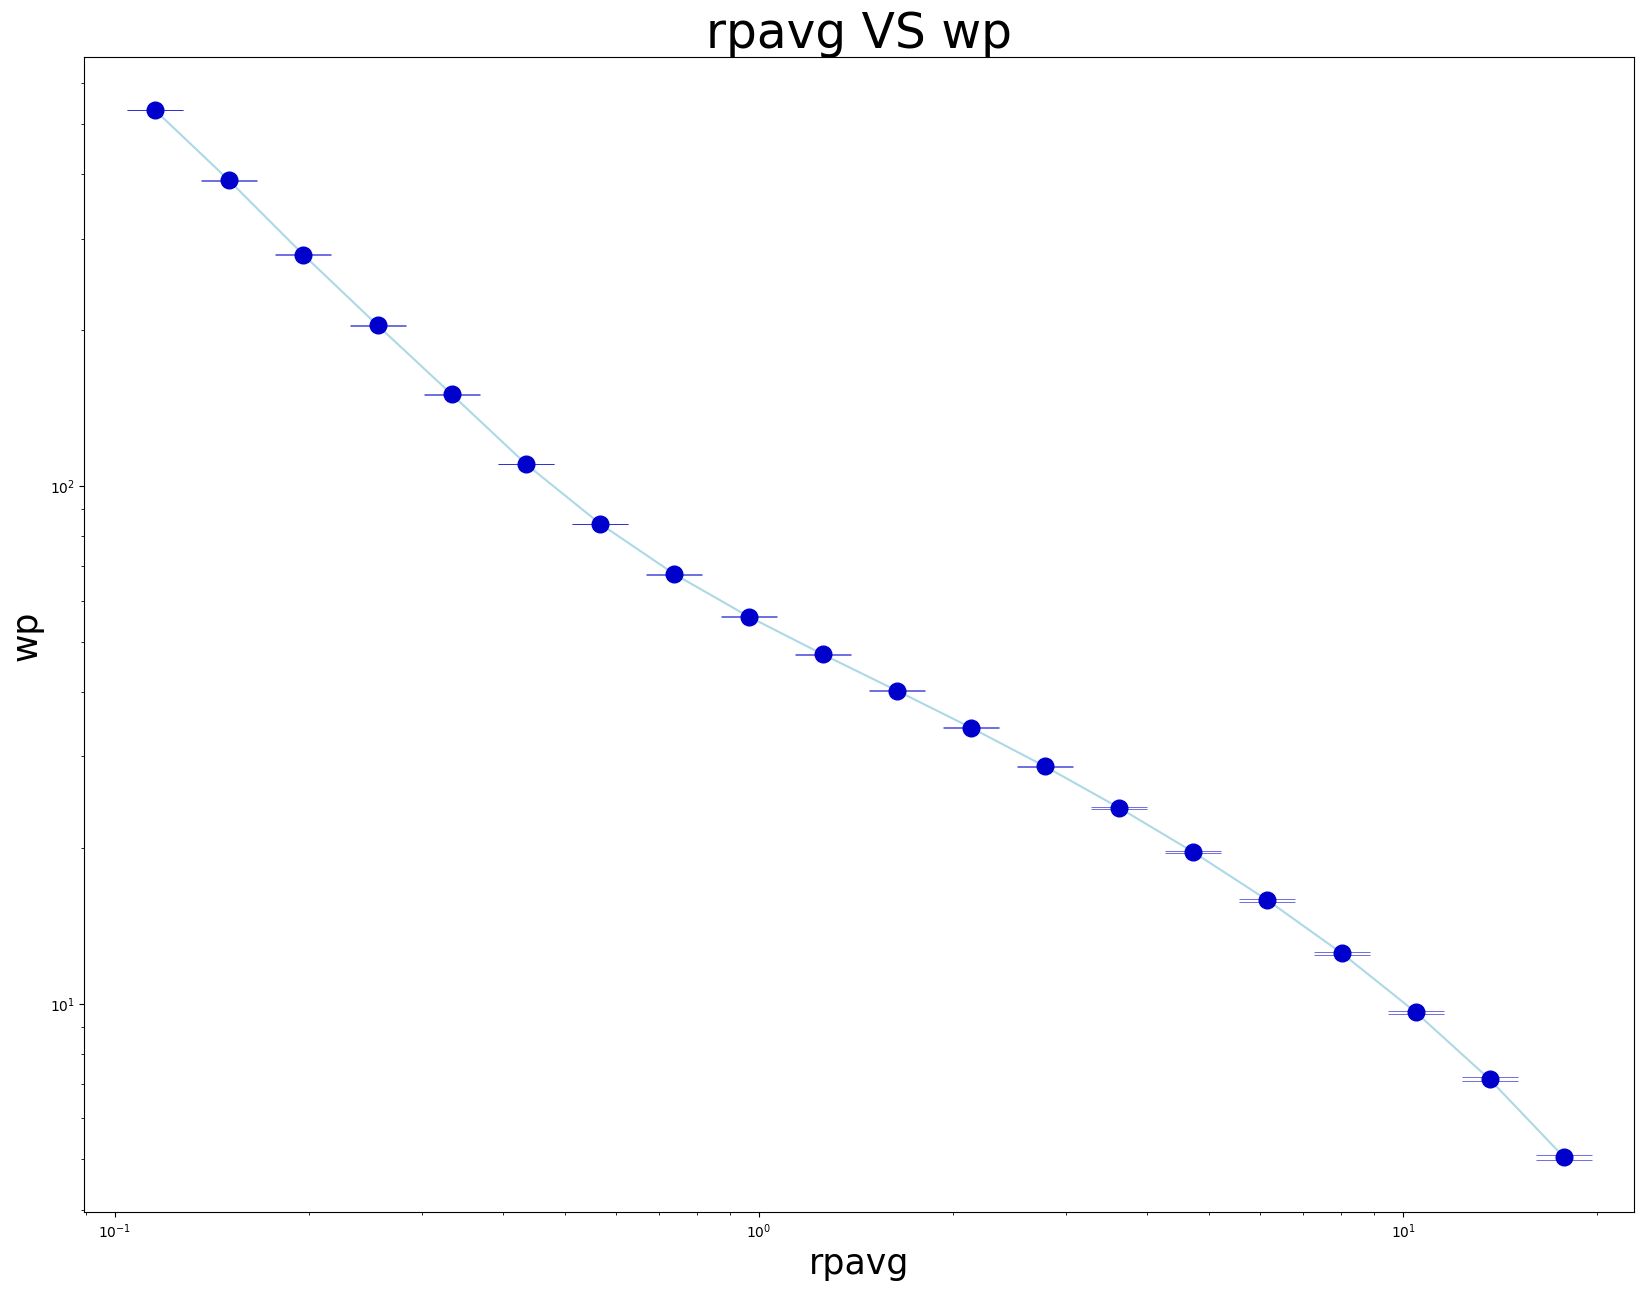

In [20]:
meanrp0_60, meanwp0_60, stdev0_60 = error_data(rpavg_0_60, wp_0_60)
wp_vs_rpavg(meanrp0_60, meanwp0_60, stdev0_60)

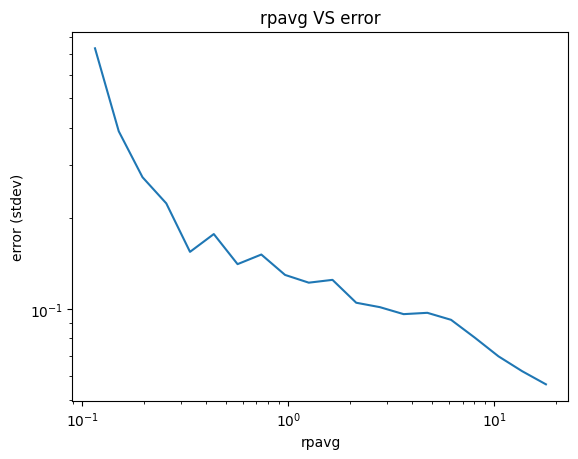

In [11]:
error_v_rp(meanrp0_60, stdev0_60)

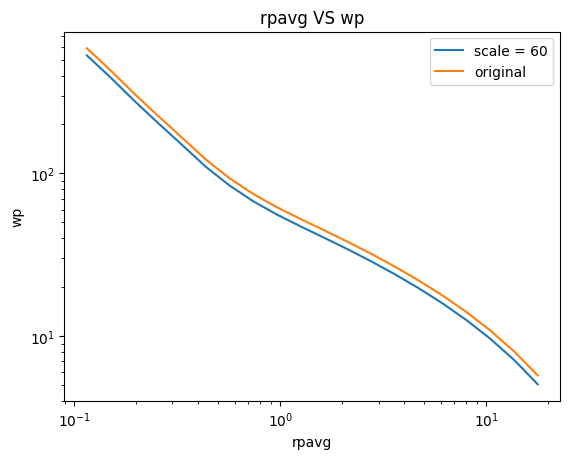

In [22]:
plot_results([meanrp0_60, meanrp0], [meanwp0_60, meanwp0], labels = ["scale = 60", "original"])

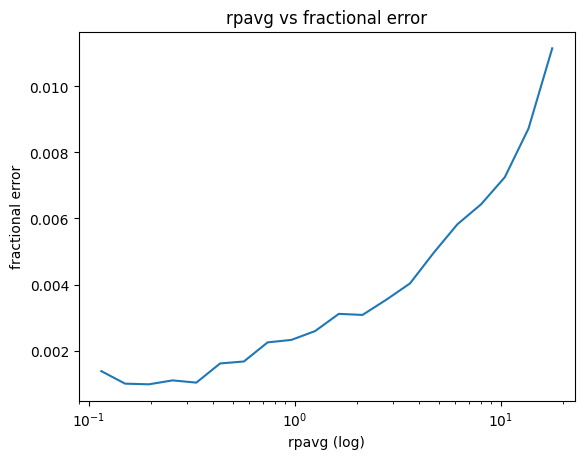

In [12]:
plot_fractional_error(stdev0_60, meanwp0_60, meanrp0_60)

## Scale = 100

In [13]:
all_wp0_100, all_rpavg0_100 = simulate(rbins, scale_ = 100)
np.savez('uncertainty_0_100.npz', array_one = all_rpavg0_100, array_two = all_wp0_100)

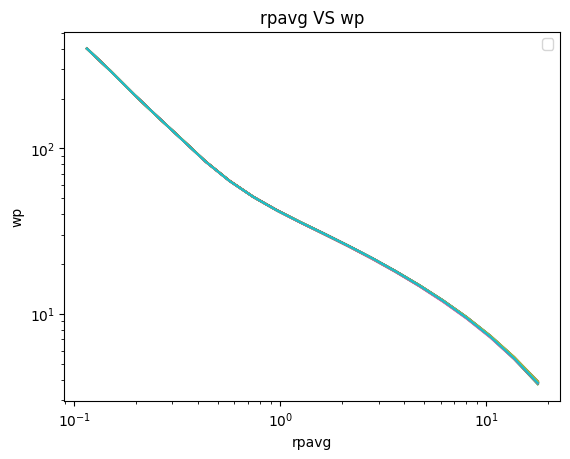

In [21]:
data0_100 = np.load('uncertainty_0_100.npz')
rpavg_0_100 = data0_100['array_one']
wp_0_100= data0_100['array_two']
plot_results(rpavg_0_100, wp_0_100)

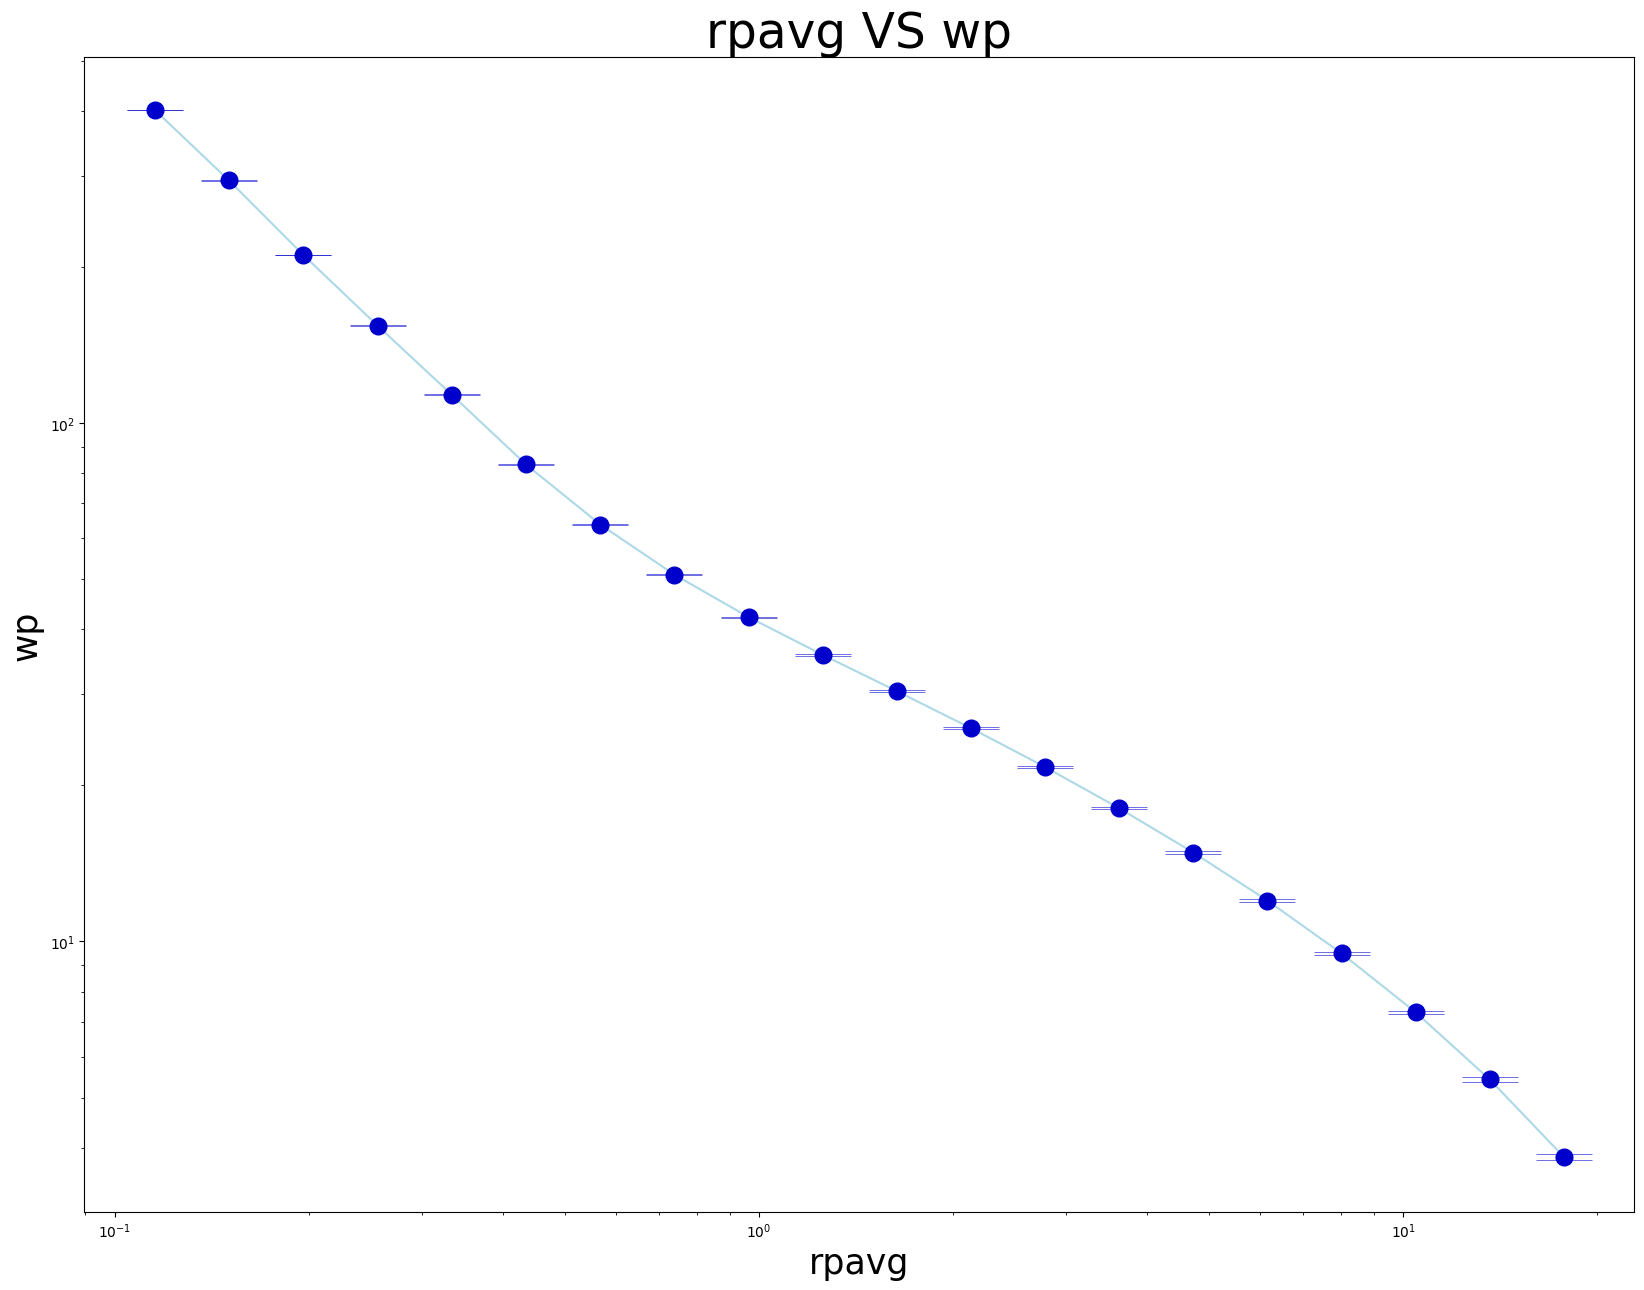

In [22]:
meanrp0_100, meanwp0_100, stdev0_100 = error_data(rpavg_0_100, wp_0_100)
wp_vs_rpavg(meanrp0_100, meanwp0_100, stdev0_100)

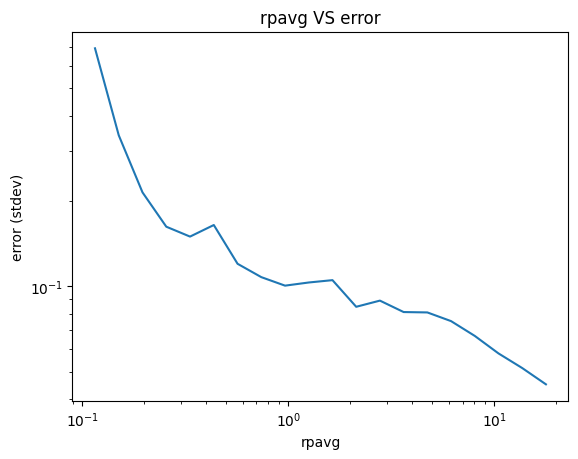

In [16]:
error_v_rp(meanrp0_100, stdev0_100)

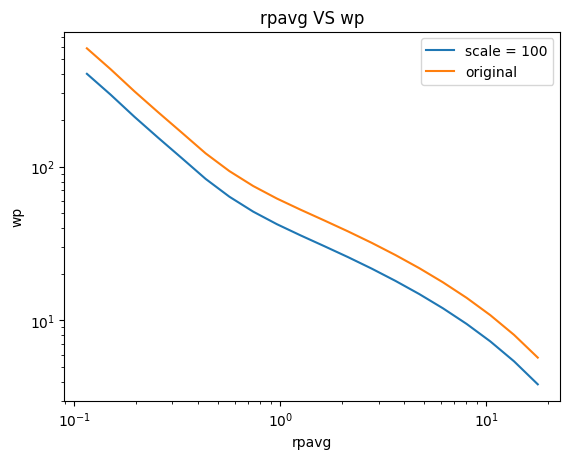

In [23]:
plot_results([meanrp0_100, meanrp0], [meanwp0_100, meanwp0], labels = ["scale = 100", "original"])

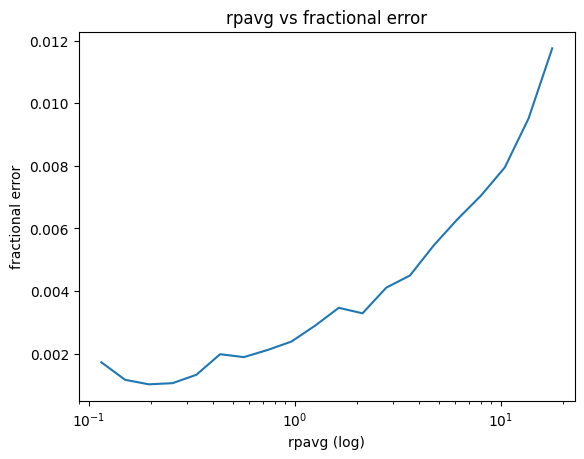

In [17]:
plot_fractional_error(stdev0_100, meanwp0_100, meanrp0_100)

## Scale = 1000

In [5]:
all_wp0_1000, all_rpavg0_1000 = simulate(rbins, scale_ = 1000)
np.savez('uncertainty_0_1000.npz', array_one = all_rpavg0_1000, array_two = all_wp0_1000)

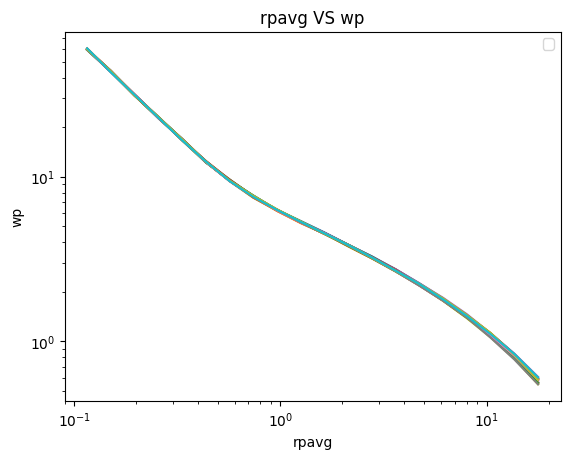

In [6]:
data0_1000 = np.load('uncertainty_0_1000.npz')
rpavg_0_1000 = data0_1000['array_one']
wp_0_1000= data0_1000['array_two']
plot_results(rpavg_0_1000, wp_0_1000)

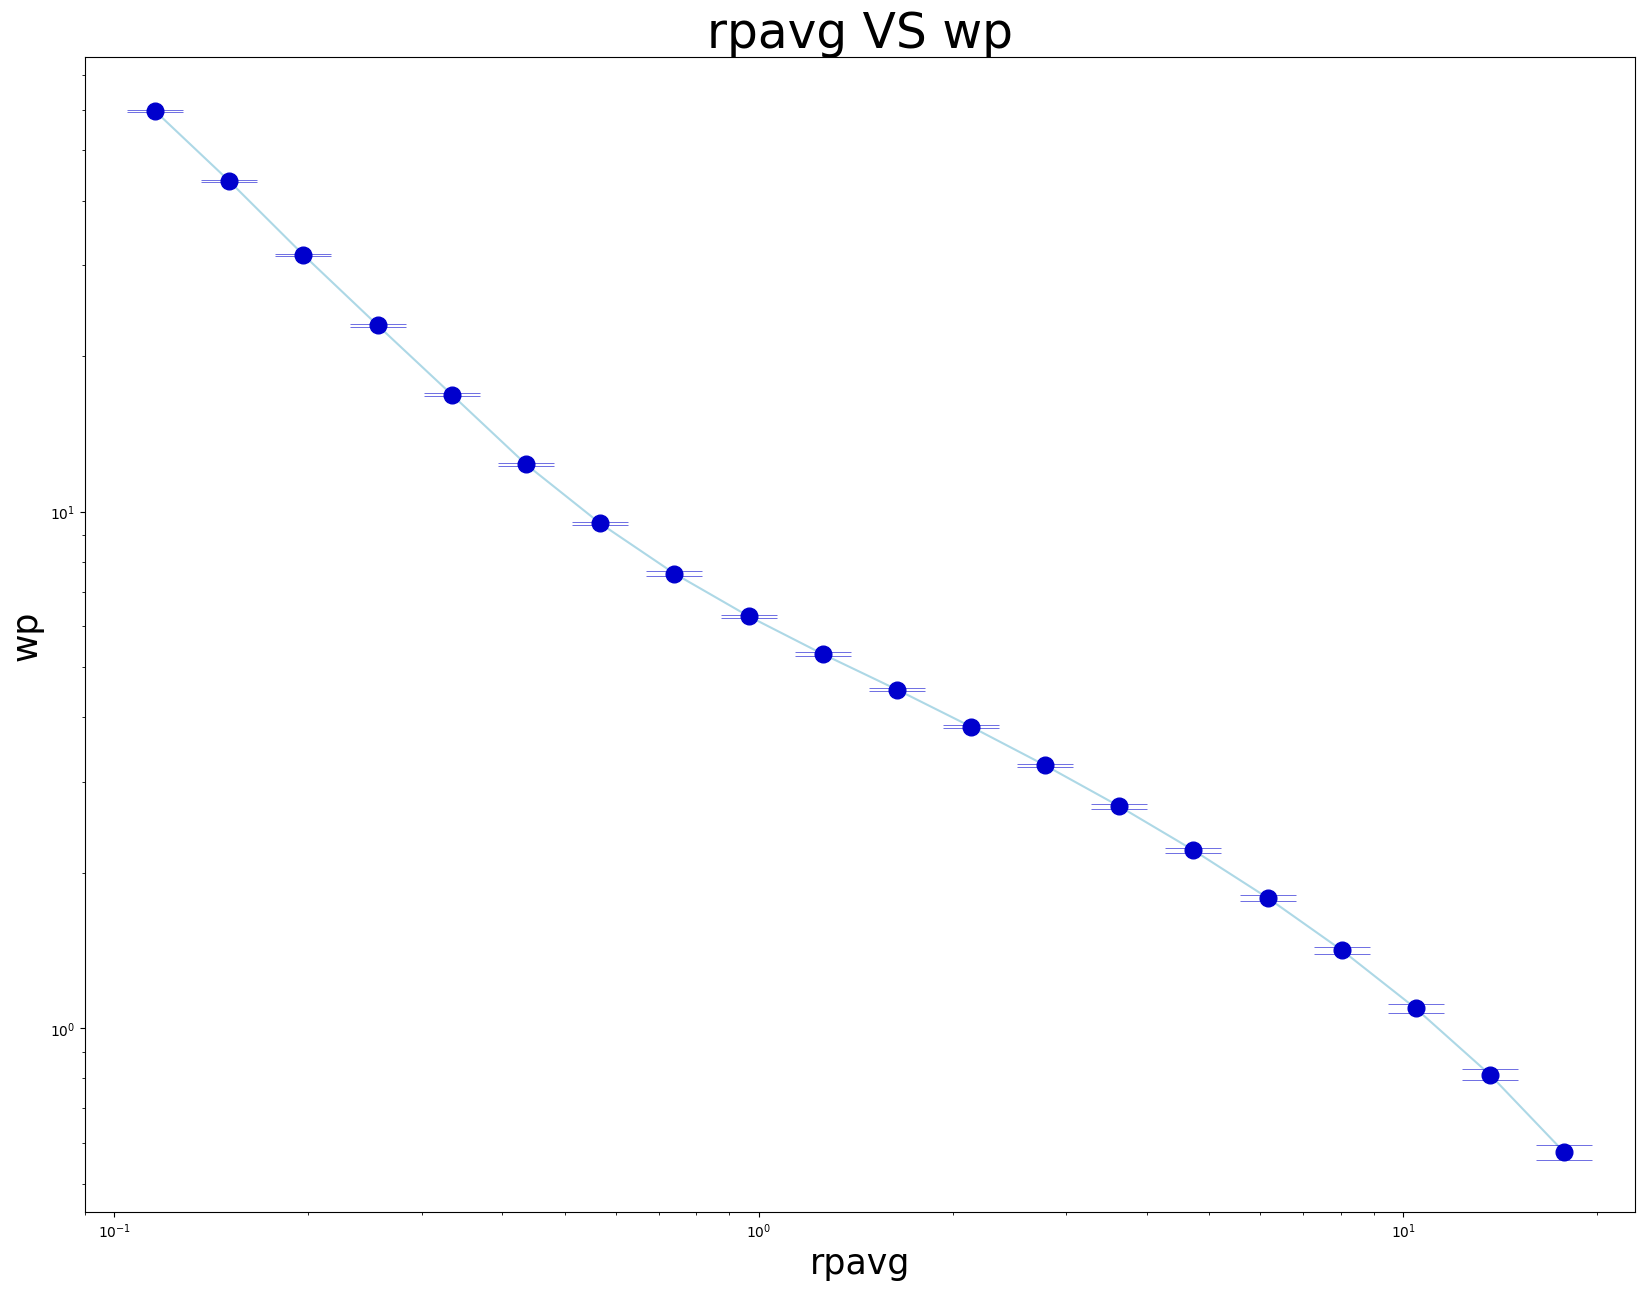

In [13]:
meanrp0_1000, meanwp0_1000, stdev0_1000 = error_data(rpavg_0_1000, wp_0_1000)
wp_vs_rpavg(meanrp0_1000, meanwp0_1000, stdev0_1000)

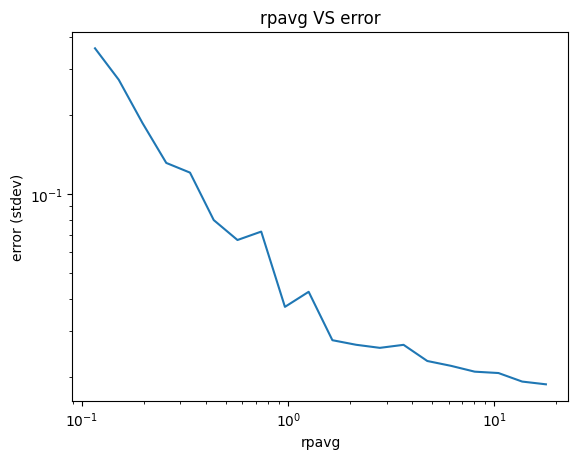

In [14]:
error_v_rp(meanrp0_1000, stdev0_1000)

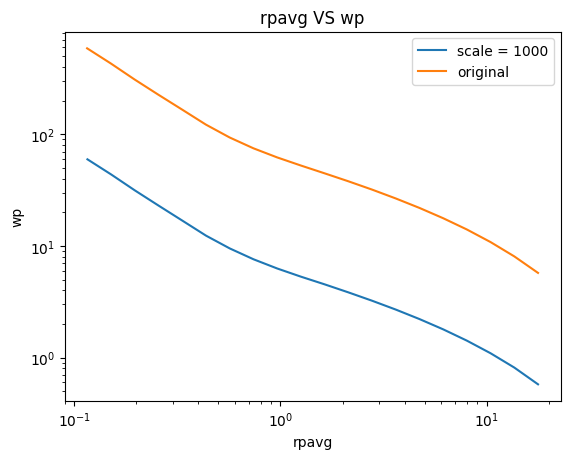

In [15]:
plot_results([meanrp0_1000, meanrp0], [meanwp0_1000, meanwp0], labels = ["scale = 1000", "original"])

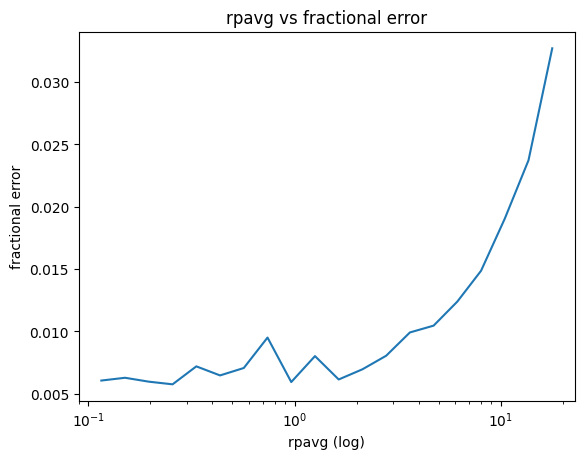

In [16]:
plot_fractional_error(stdev0_1000, meanwp0_1000, meanrp0_1000)

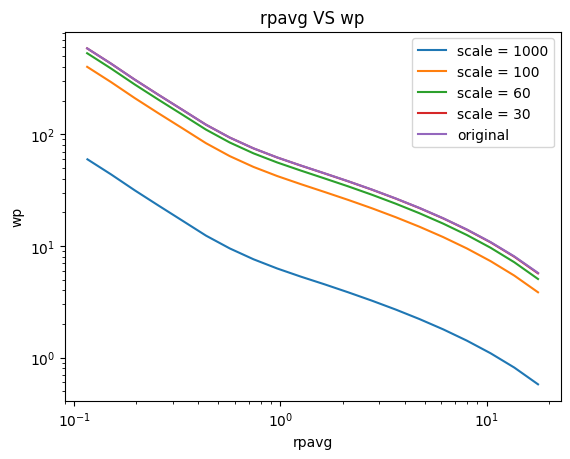

In [23]:
plot_results([meanrp0_1000, meanrp0_100, meanrp0_60, meanrp0_30, meanrp0], [meanwp0_1000, meanwp0_100, meanwp0_60, meanwp0_30, meanwp0], labels = ["scale = 1000", "scale = 100","scale = 60", "scale = 30", "original"])